In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
import os
import uuid
import hashlib
from datetime import datetime
from pathlib import Path
from typing import Optional
from enum import Enum

import pixeltable as pxt
from pixeltable.iterators import AudioSplitter
from pixeltable.iterators.video import FrameIterator
from pixeltable.functions import openai, video, huggingface
from pixeltable.functions.video import extract_audio

from loguru import logger

import multimodal_mcp.video.ingestion.registry as registry
from multimodal_mcp.config import get_settings  # ✅ added for configuration import
from multimodal_mcp.video.ingestion.helper import resize_image

logger = logger.bind(name="VideoProcessor")
settings = get_settings()

In [4]:
registry.delete_registry_table()

2025-10-28 17:03:20.499 | INFO     | multimodal_mcp.video.ingestion.registry:delete_registry_table:196 - Registry table 'groq_hf_registory_table.groq_hf_video_registry' does not exist. Nothing to delete.


Connected to Pixeltable database at: postgresql+psycopg://postgres:@127.0.0.1:53071/pixeltable


In [5]:
settings.DEFAULT_VIDEO_TABLE_DIR

'groq_hf_video_tables'

In [6]:
DEFAULT_VIDEO_TABLE_DIR = settings.DEFAULT_VIDEO_TABLE_DIR
if DEFAULT_VIDEO_TABLE_DIR in pxt.list_dirs():
    pxt.drop_dir(DEFAULT_VIDEO_TABLE_DIR, force=True)

from multimodal_mcp.video.ingestion.video_processor import(
    VideoProcessor, VideoStatus
)

2025-10-28 17:03:44.909 | INFO     | multimodal_mcp.video.ingestion.video_processor:_ensure_global_dir_exists:80 - Created global directory 'groq_hf_video_tables' ✅
2025-10-28 17:03:44.909 | INFO     | multimodal_mcp.video.ingestion.registry:get_video_details_by_name:92 - Looking up registry details for video 'pass_the_butter_rick_and_morty'
2025-10-28 17:03:45.004 | INFO     | multimodal_mcp.video.ingestion.registry:_ensure_registry_table:57 - Created new registry table: groq_hf_registory_table.groq_hf_video_registry
2025-10-28 17:03:45.015 | INFO     | multimodal_mcp.video.ingestion.registry:get_video_details_by_name:102 - No registry entry found for video 'pass_the_butter_rick_and_morty'
2025-10-28 17:03:45.080 | INFO     | multimodal_mcp.video.ingestion.video_processor:_setup_table:125 - Created new Pixeltable: groq_hf_video_tables.v_765b_pass_the_butter_rick_and_morty


Created directory 'groq_hf_video_tables'.
Created table 'groq_hf_video_registry'.
Created table 'v_765b_pass_the_butter_rick_and_morty'.
Inserting rows into `v_765b_pass_the_butter_rick_and_morty`: 1 rows [00:00, 82.95 rows/s]

2025-10-28 17:03:45.251 | SUCCESS  | multimodal_mcp.video.ingestion.video_processor:add_video:408 - 🎬 Added new video './data/pass_the_butter_rick_and_morty.mp4' to Pixeltable 'groq_hf_video_tables.v_765b_pass_the_butter_rick_and_morty'.
2025-10-28 17:03:45.261 | INFO     | multimodal_mcp.video.ingestion.video_processor:_process_video:152 - 🚀 Processing video: pass_the_butter_rick_and_morty



Inserted 1 row with 0 errors.
Inserting rows into `v_765b_pass_the_butter_rick_and_morty`: 1 rows [00:00, 163.48 rows/s]

2025-10-28 17:03:45.317 | INFO     | multimodal_mcp.video.ingestion.video_processor:_setup_audio_pipeline:224 - 🎧 Setting up audio processing pipeline...



Added 1 column value with 0 errors.
Inserting rows into `v_765b_pass_the_butter_rick_and_morty_audio_chunks_view`: 8 rows [00:00, 658.69 rows/s]
Added 8 column values with 0 errors.
Added 8 column values with 0 errors.


2025-10-28 17:03:57.323 | SUCCESS  | multimodal_mcp.video.ingestion.video_processor:_setup_audio_pipeline:287 - Audio pipeline complete ✅
2025-10-28 17:03:57.323 | INFO     | multimodal_mcp.video.ingestion.video_processor:_setup_frame_pipeline:299 - 🎞️ Setting up frame processing pipeline...


Inserting rows into `v_765b_pass_the_butter_rick_and_morty_frames_view`: 20 rows [00:00, 4518.02 rows/s]
Added 20 column values with 0 errors.


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
2025-10-28 17:04:09.033 | INFO     | multimodal_mcp.groq_functions:_sync_infer:184 - Sending vision prompt to meta-llama/llama-4-scout-17b-16e-instruct
2025-10-28 17:04:09.076 | INFO     | multimodal_mcp.groq_functions:_sync_infer:184 - Sending vision prompt to meta-llama/llama-4-scout-17b-16e-instruct
2025-10-28 17:04:09.111 | INFO     | multimodal_mcp.groq_functions:_sync_infer:184 - Sending vision prompt to meta-llama/llama-4-scout-17b-16e-instruct
2025-10-28 17:04:09.160 | INFO     | multimodal_mcp.groq_functions:_sync_infer:184 - Sending vision prompt to meta-llama/llama-4-scout-17b-16e-instruct
2025-10-28 17:04:09.193 | INFO     | multimodal_mcp.groq_functions:_

Added 20 column values with 0 errors.


2025-10-28 17:04:19.012 | SUCCESS  | multimodal_mcp.video.ingestion.video_processor:_setup_frame_pipeline:368 - Frame pipeline complete ✅


Inserting rows into `v_765b_pass_the_butter_rick_and_morty`: 1 rows [00:00, 230.58 rows/s]

2025-10-28 17:04:19.058 | SUCCESS  | multimodal_mcp.video.ingestion.video_processor:_process_video:163 - ✅ Finished processing 'pass_the_butter_rick_and_morty'.
2025-10-28 17:04:19.058 | INFO     | multimodal_mcp.video.ingestion.registry:register_video_table:125 - Registering video 'pass_the_butter_rick_and_morty' with Pixeltable 'groq_hf_video_tables.v_765b_pass_the_butter_rick_and_morty'
2025-10-28 17:04:19.101 | INFO     | multimodal_mcp.video.ingestion.registry:_ensure_registry_table:45 - Loaded existing registry table: groq_hf_registory_table.groq_hf_video_registry



Inserting rows into `groq_hf_video_registry`: 1 rows [00:00, 166.52 rows/s]

2025-10-28 17:04:19.152 | SUCCESS  | multimodal_mcp.video.ingestion.registry:register_video_table:145 - Registered video 'pass_the_butter_rick_and_morty' with table 'groq_hf_video_tables.v_765b_pass_the_butter_rick_and_morty' ✅



Inserted 1 row with 0 errors.


video  \
0  E:\python projects\multi-modal-rag\mulimodal-m...   

                       video_name status                     processed_at  \
0  pass_the_butter_rick_and_morty   done 2025-10-28 17:04:19.023671+05:00   

  transcript_summary                                      audio_extract  
0               None  C:\Users\kamran\.pixeltable\media\e898c1ac9d4d...
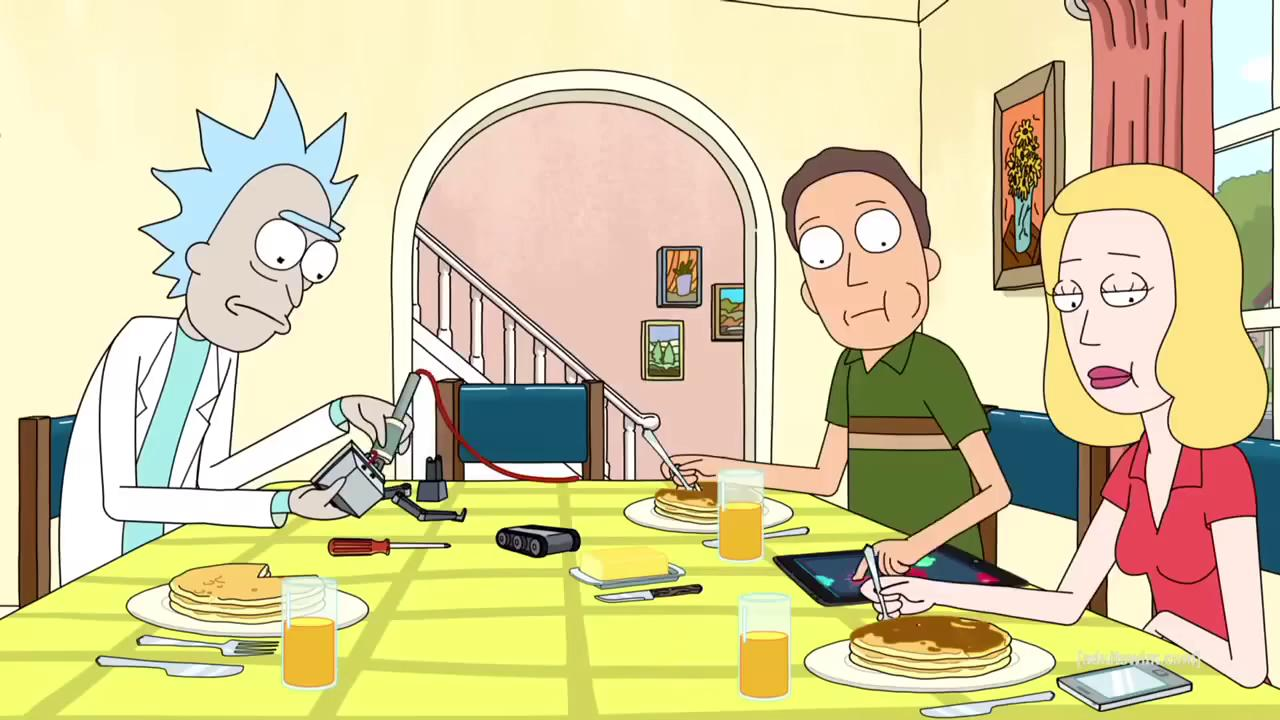

In [7]:
from multimodal_mcp.video.ingestion.video_processor import VideoProcessor

video_path = "./data/pass_the_butter_rick_and_morty.mp4"

video_processor = VideoProcessor()
video_processor.add_video(video_path)
video_processor.video_table.show()

In [8]:
# Collect and print all rows
print(video_processor.video_table.collect())
print("=======================")
print(pxt.list_tables())
print("=======================")

                                                                                                                   video                      video_name status                     processed_at transcript_summary                                                                                                                                          audio_extract
0  E:\python projects\multi-modal-rag\mulimodal-mcp\src\multimodal_mcp\notebooks\data\pass_the_butter_rick_and_morty.mp4  pass_the_butter_rick_and_morty   done 2025-10-28 17:04:19.023671+05:00               None  C:\Users\kamran\.pixeltable\media\e898c1ac9d4d4c4c9292114b6e6aa720\17\17ed\e898c1ac9d4d4c4c9292114b6e6aa720_15_3_17ed5121066647a1911300102444d54d.mp3
['small_chunks_view', 'test.videos', 'test.audio_chunks', 'test.frames_view', 'test_image.image', 'groq_hf_registory_table.groq_hf_video_registry', 'groq_hf_video_tables.v_765b_pass_the_butter_rick_and_morty_frames_view', 'groq_hf_video_tables.v_765b_pass_the_butter_rick_an

In [11]:
registry_table = registry._ensure_registry_table()
registry_table.where(registry_table.video_name == "pass_the_butter_rick_and_morty").collect()

2025-10-28 17:05:32.267 | INFO     | multimodal_mcp.video.ingestion.registry:_ensure_registry_table:45 - Loaded existing registry table: groq_hf_registory_table.groq_hf_video_registry


video_name  \
0  pass_the_butter_rick_and_morty   

                                    video_table_path  \
0  groq_hf_video_tables.v_765b_pass_the_butter_ri...   

                              audio_chunks_view_name  \
0  groq_hf_video_tables.v_765b_pass_the_butter_ri...   

                                    frames_view_name  \
0  groq_hf_video_tables.v_765b_pass_the_butter_ri...   

                        created_at  
0 2025-10-28 17:04:19.123214+05:00

video  \
0  E:\python projects\multi-modal-rag\mulimodal-m...   

                       video_name status                     processed_at  \
0  pass_the_butter_rick_and_morty   done 2025-10-28 17:04:19.023671+05:00   

  transcript_summary                                      audio_extract  
0               None  C:\Users\kamran\.pixeltable\media\e898c1ac9d4d...
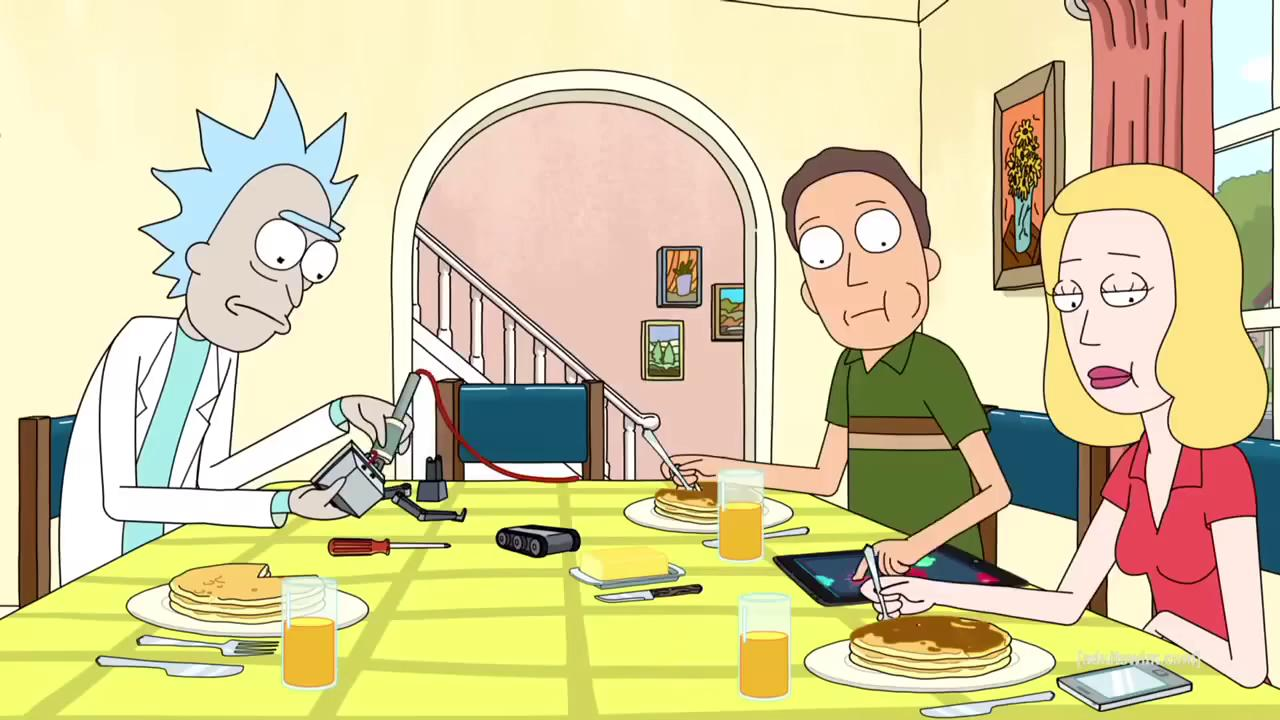

In [12]:
video_processor.video_table.show()

In [13]:
video_processor.add_video(video_path)

2025-10-28 17:05:45.117 | INFO     | multimodal_mcp.video.ingestion.registry:get_video_details_by_name:92 - Looking up registry details for video 'pass_the_butter_rick_and_morty'
2025-10-28 17:05:45.206 | INFO     | multimodal_mcp.video.ingestion.registry:_ensure_registry_table:45 - Loaded existing registry table: groq_hf_registory_table.groq_hf_video_registry
2025-10-28 17:05:45.219 | INFO     | multimodal_mcp.video.ingestion.registry:get_video_details_by_name:99 - Found registry entry for video 'pass_the_butter_rick_and_morty'
2025-10-28 17:05:45.237 | INFO     | multimodal_mcp.video.ingestion.video_processor:_setup_table:102 - Loaded existing table 'groq_hf_video_tables.v_765b_pass_the_butter_rick_and_morty' for video 'pass_the_butter_rick_and_morty'
2025-10-28 17:05:45.273 | INFO     | multimodal_mcp.video.ingestion.video_processor:add_video:392 - ⚠️ Video './data/pass_the_butter_rick_and_morty.mp4' already exists in table 'groq_hf_video_tables.v_765b_pass_the_butter_rick_and_morty

False

pos  start_time_sec  end_time_sec  \
0    0           0.023       10.0081   
1    1           8.040       18.0001   
2    2          16.032       26.0161   

                                         audio_chunk  \
0  C:\Users\kamran\.pixeltable\media\5487af1845ea...   
1  C:\Users\kamran\.pixeltable\media\5487af1845ea...   
2  C:\Users\kamran\.pixeltable\media\5487af1845ea...   

                                       transcription  \
0  {'text': ' Hey Rick, I have to make a project ...   
1  {'text': ' Traditionally, science fairs are a ...   
2  {'text': ' you to work on a science project wi...   

                                    audio_chunk_text  \
0  Hey Rick, I have to make a project for the sci...   
1  Traditionally, science fairs are a father-son ...   
2  you to work on a science project with your dad...   

                                               video  \
0  E:\python projects\multi-modal-rag\mulimodal-m...   
1  E:\python projects\multi-modal-rag\mulimodal-m...   
2  E:\python projects\multi-modal-rag\mulimodal-m...   

                       video_name status                     processed_at  \
0  pass_the_butter_rick_and_morty   done 2025-10-28 17:04:19.023671+05:00   
1  pass_the_butter_rick_and_morty   done 2025-10-28 17:04:19.023671+05:00   
2  pass_the_butter_rick_and_morty   done 2025-10-28 17:04:19.023671+05:00   

  transcript_summary                                      audio_extract  
0               None  C:\Users\kamran\.pixeltable\media\e898c1ac9d4d...  
1               None  C:\Users\kamran\.pixeltable\media\e898c1ac9d4d...  
2               None  C:\Users\kamran\.pixeltable\media\e898c1ac9d4d...
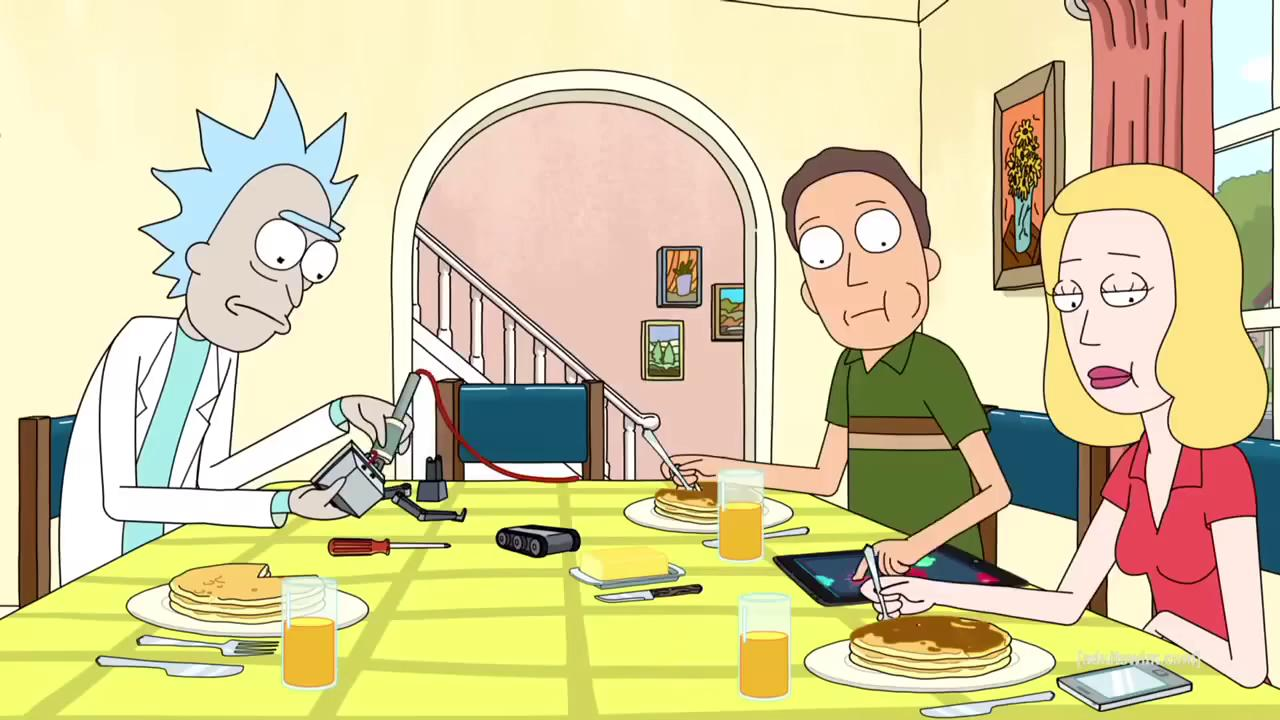
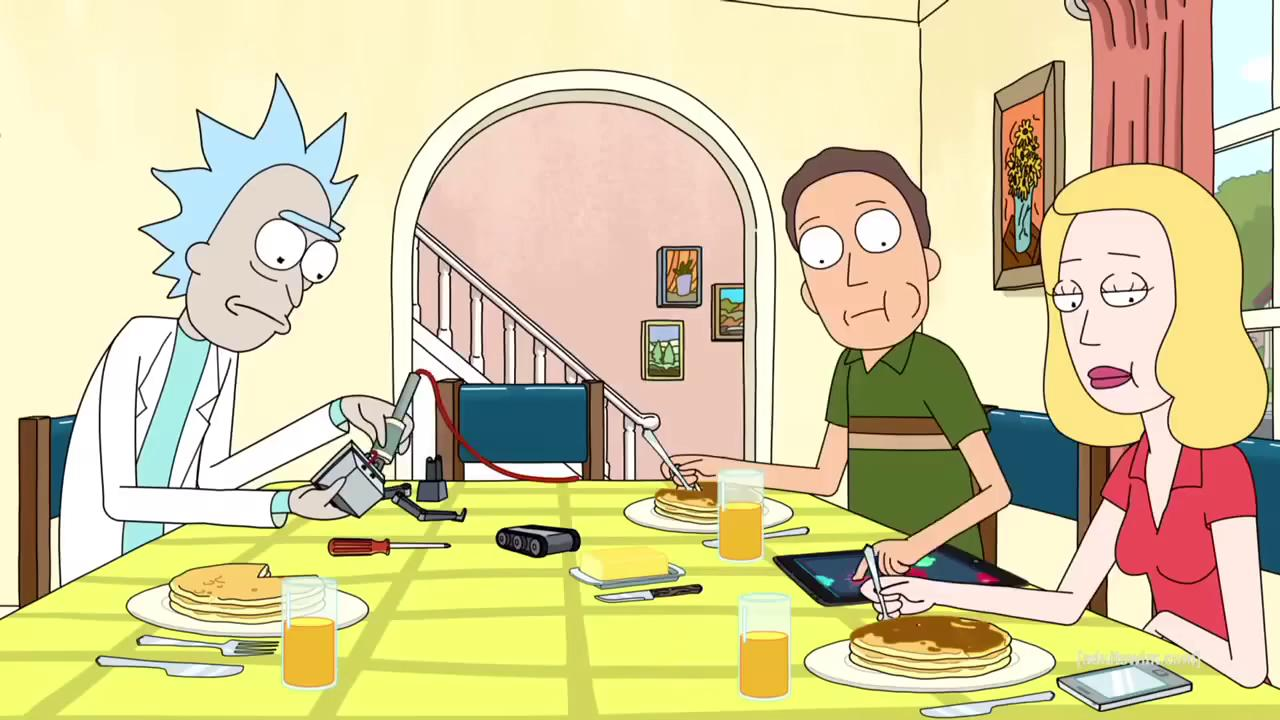
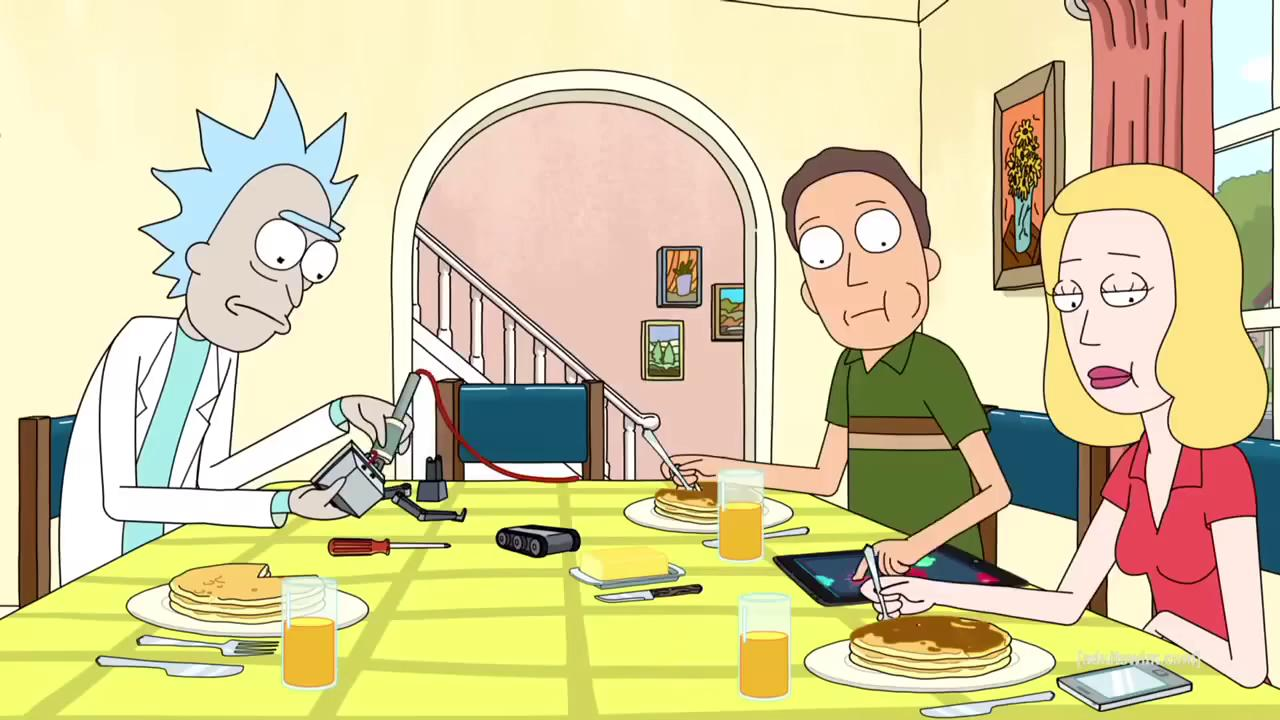

In [14]:
video_processor.audio_chunks_view.show(3)

pos  frame_idx      pos_msec  pos_frame  \
0   18         18  54821.433333       1643   
1   17         17  51785.066667       1552   
2   12         12  36569.866667       1096   

                                               frame resized_frame  \
0  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
1  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
2  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   

                                             caption  \
0  The image depicts a scene from the animated te...   
1  The image depicts a scene from the animated te...   
2  The image depicts a scene from the animated te...   

                                               video  \
0  E:\python projects\multi-modal-rag\mulimodal-m...   
1  E:\python projects\multi-modal-rag\mulimodal-m...   
2  E:\python projects\multi-modal-rag\mulimodal-m...   

                       video_name status                     processed_at  \
0  pass_the_butter_rick_and_morty   done 2025-10-28 17:04:19.023671+05:00   
1  pass_the_butter_rick_and_morty   done 2025-10-28 17:04:19.023671+05:00   
2  pass_the_butter_rick_and_morty   done 2025-10-28 17:04:19.023671+05:00   

  transcript_summary                                      audio_extract  
0               None  C:\Users\kamran\.pixeltable\media\e898c1ac9d4d...  
1               None  C:\Users\kamran\.pixeltable\media\e898c1ac9d4d...  
2               None  C:\Users\kamran\.pixeltable\media\e898c1ac9d4d...
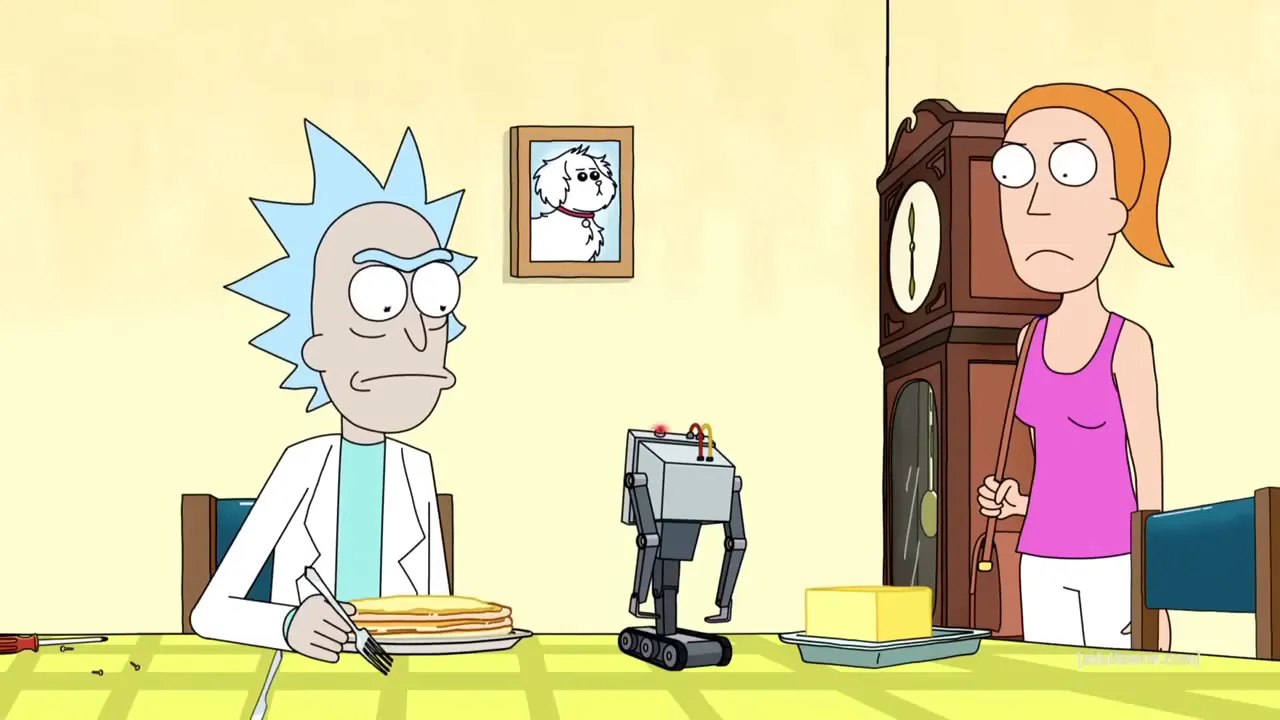
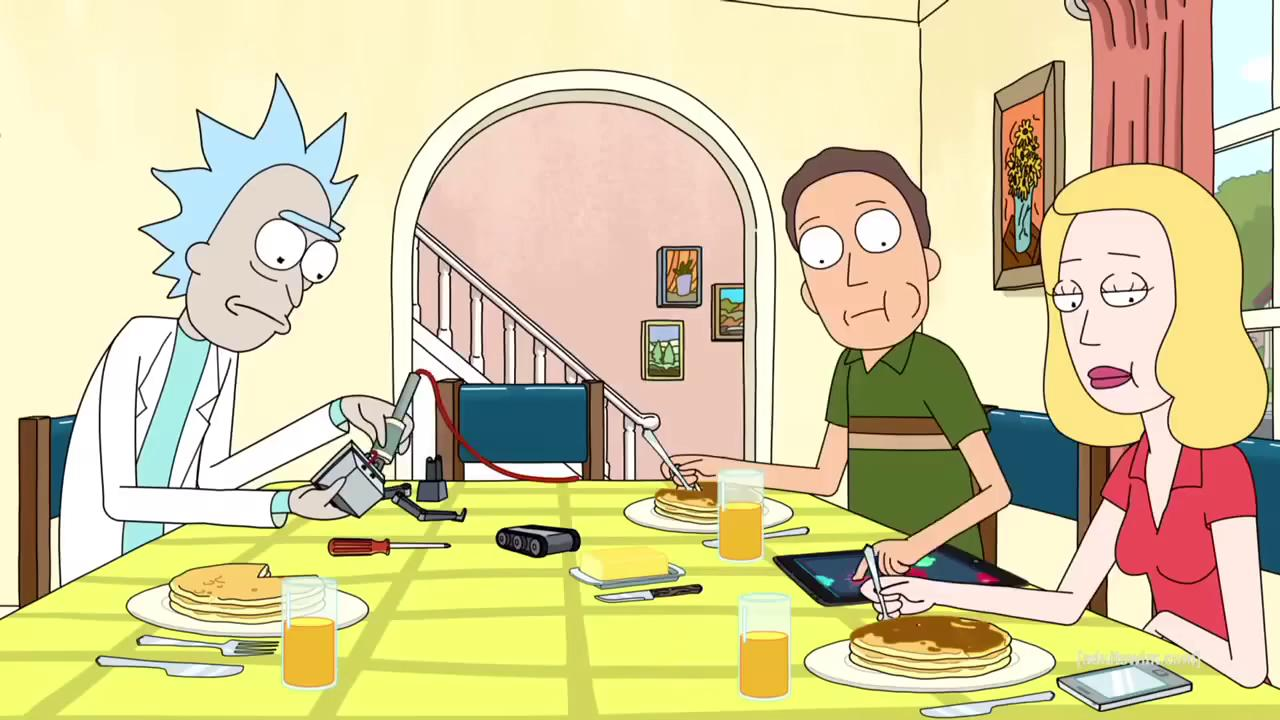
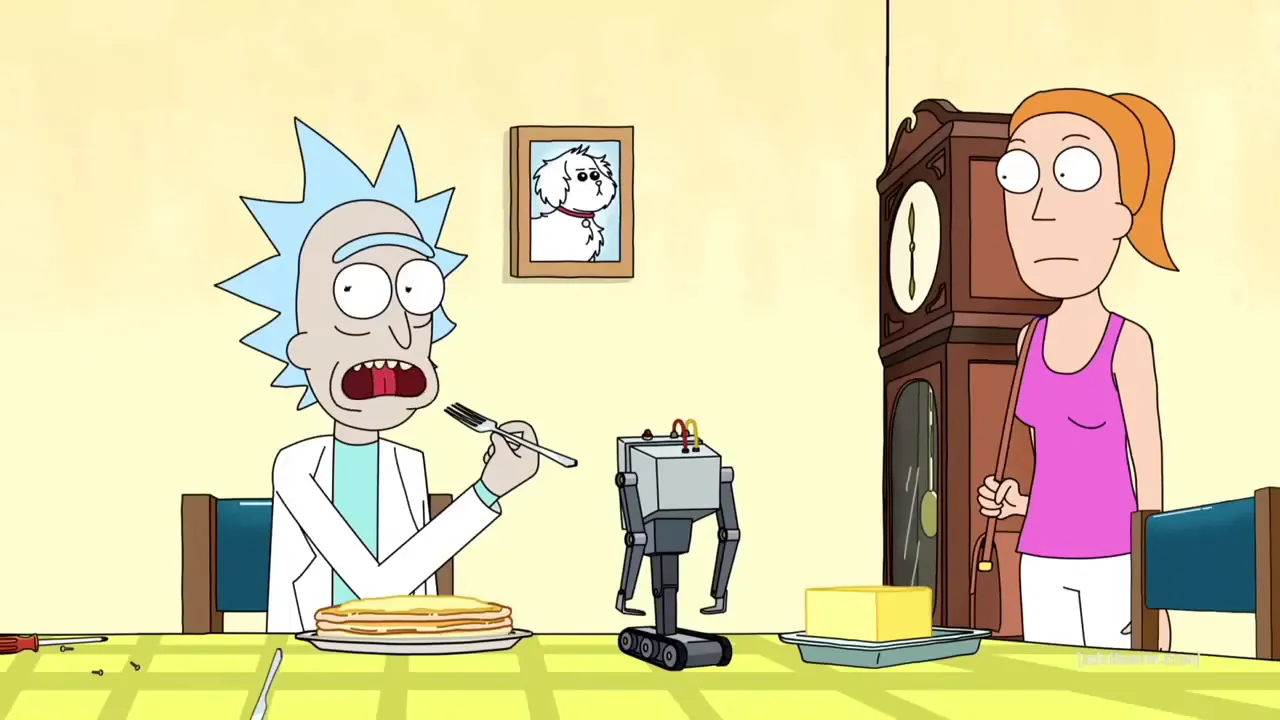
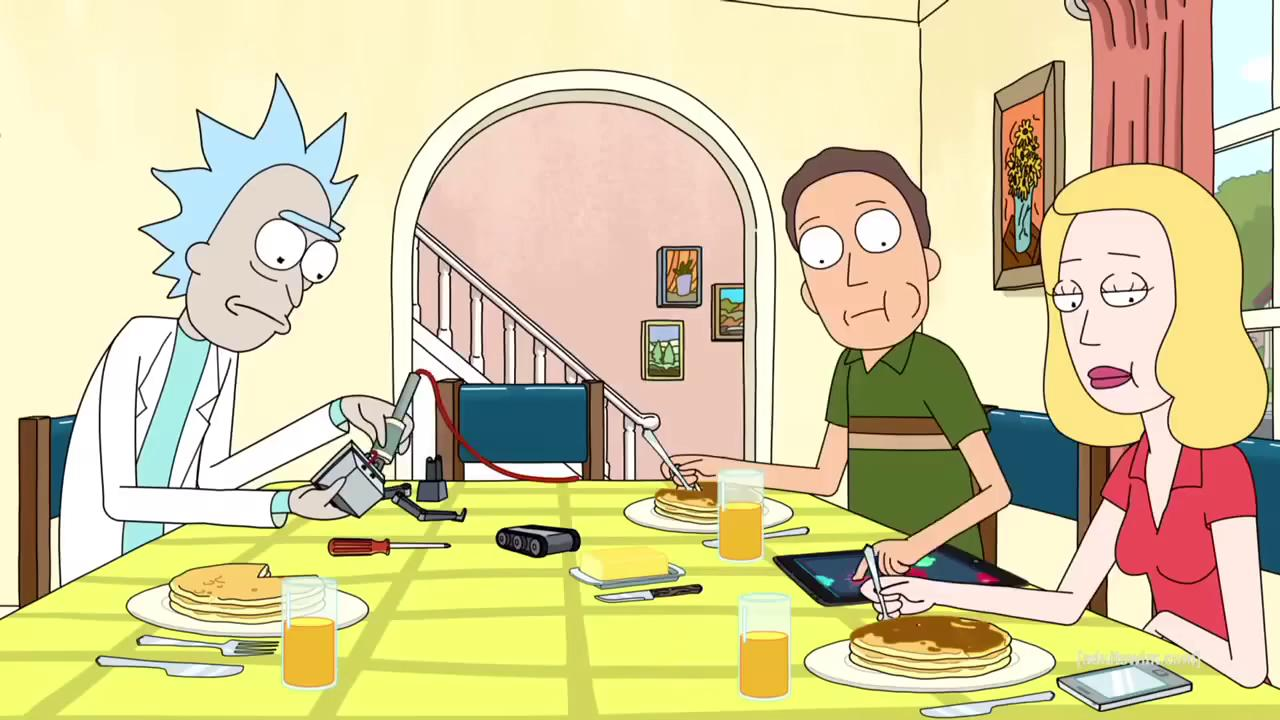
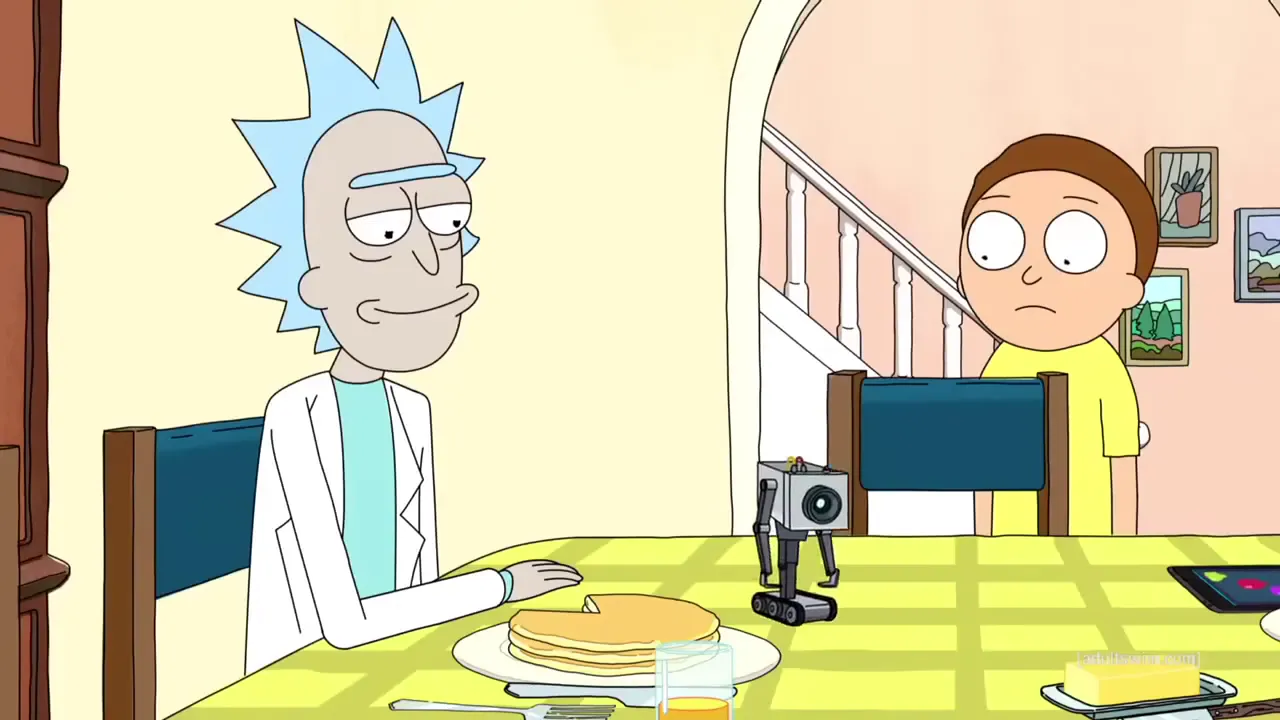
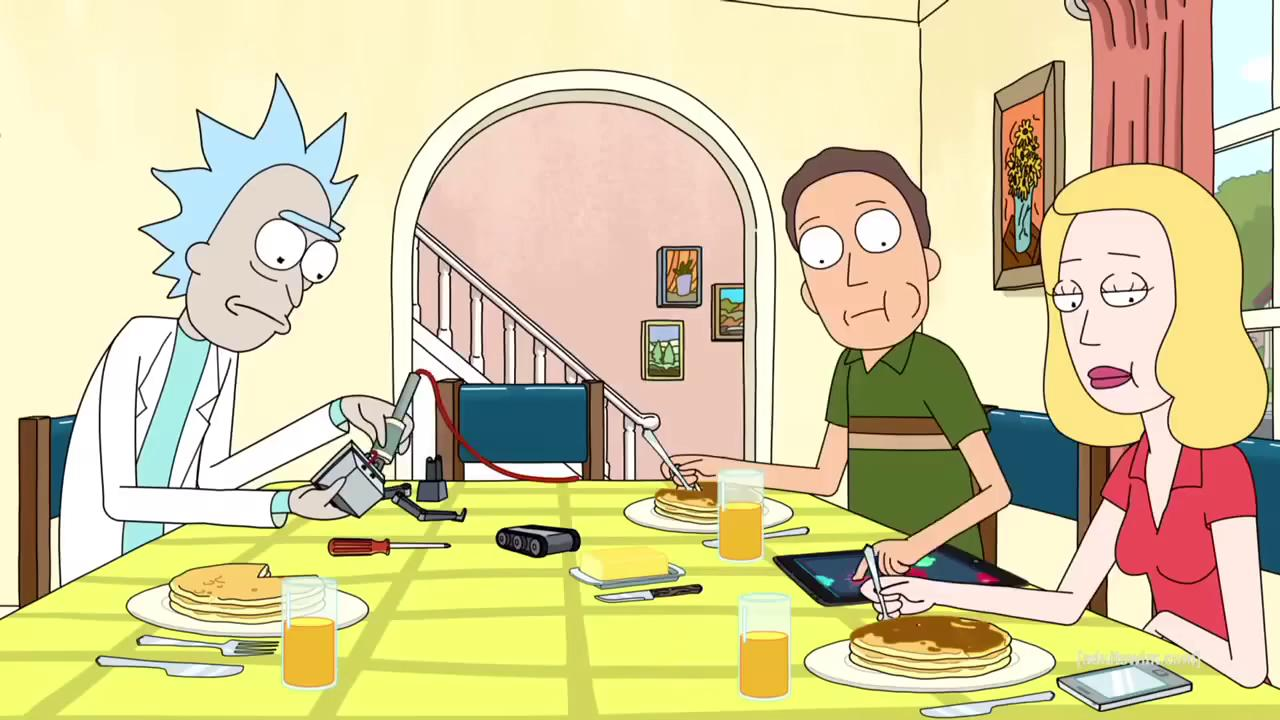

In [15]:
video_processor.frames_view.show(3)

pos  frame_idx      pos_msec  pos_frame  \
0    18         18  54821.433333       1643   
1    17         17  51785.066667       1552   
2    12         12  36569.866667       1096   
3     9          9  27427.400000        822   
4    19         19  57891.166667       1735   
5    16         16  48748.700000       1461   
6    13         13  39606.233333       1187   
7    10         10  30463.766667        913   
8    14         14  42642.600000       1278   
9    15         15  45712.333333       1370   
10    3          3   9142.466667        274   
11    7          7  21321.300000        639   
12    8          8  24357.666667        730   
13    1          1   3036.366667         91   
14    2          2   6106.100000        183   
15   11         11  33500.133333       1004   
16    4          4  12178.833333        365   
17    5          5  15215.200000        456   
18    6          6  18284.933333        548   
19    0          0      0.000000          0   

                                                frame resized_frame  \
0   <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
1   <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
2   <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
3   <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
4   <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
5   <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
6   <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
7   <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
8   <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
9   <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
10  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
11  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
12  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
13  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
14  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
15  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
16  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
17  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
18  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   
19  <PIL.Image.Image image mode=RGB size=1280x720 ...          None   

                                              caption  \
0   The image depicts a scene from the animated te...   
1   The image depicts a scene from the animated te...   
2   The image depicts a scene from the animated te...   
3   The image depicts a still from an animated sho...   
4   The image depicts a cartoon-style robot on a y...   
5   The image depicts a scene from the animated te...   
6   The image depicts a scene from the animated te...   
7   The image depicts a scene from the animated te...   
8   The image depicts a scene from the animated te...   
9   The image depicts a scene from the animated te...   
10  The image depicts a scene from the animated te...   
11  The image depicts a still from an animated tel...   
12  The image depicts a scene from the animated te...   
13  The image shows a scene from the animated TV s...   
14  The image depicts a scene from the animated te...   
15  The image depicts a still from the animated te...   
16  The image depicts a scene from the animated te...   
17  The image depicts a scene from the animated te...   
18  The image depicts a cartoon scene of a family ...   
19  The image depicts a scene from the animated te...   

                                                video  \
0   E:\python projects\multi-modal-rag\mulimodal-m...   
1   E:\python projects\multi-modal-rag\mulimodal-m...   
2   E:\python projects\multi-modal-rag\mulimodal-m...   
3   E:\python projects\multi-modal-rag\mulimodal-m...   
4   E:\python projects\multi-modal-rag\mu
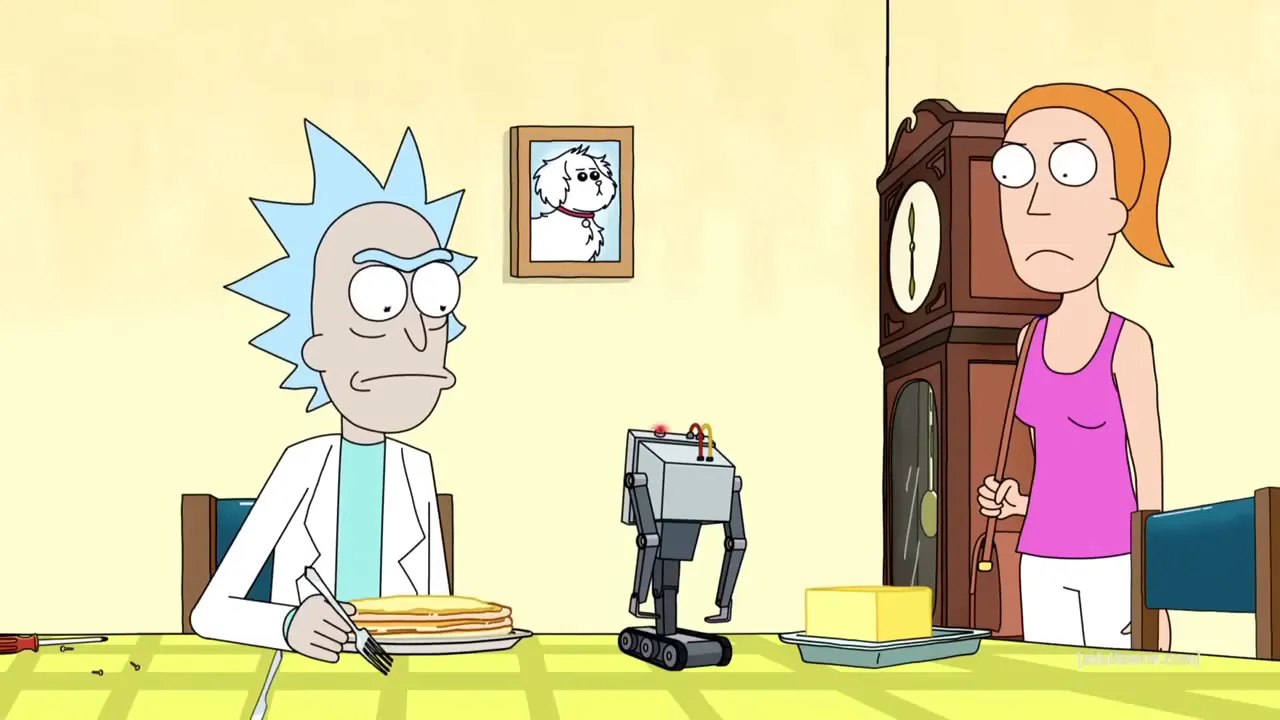
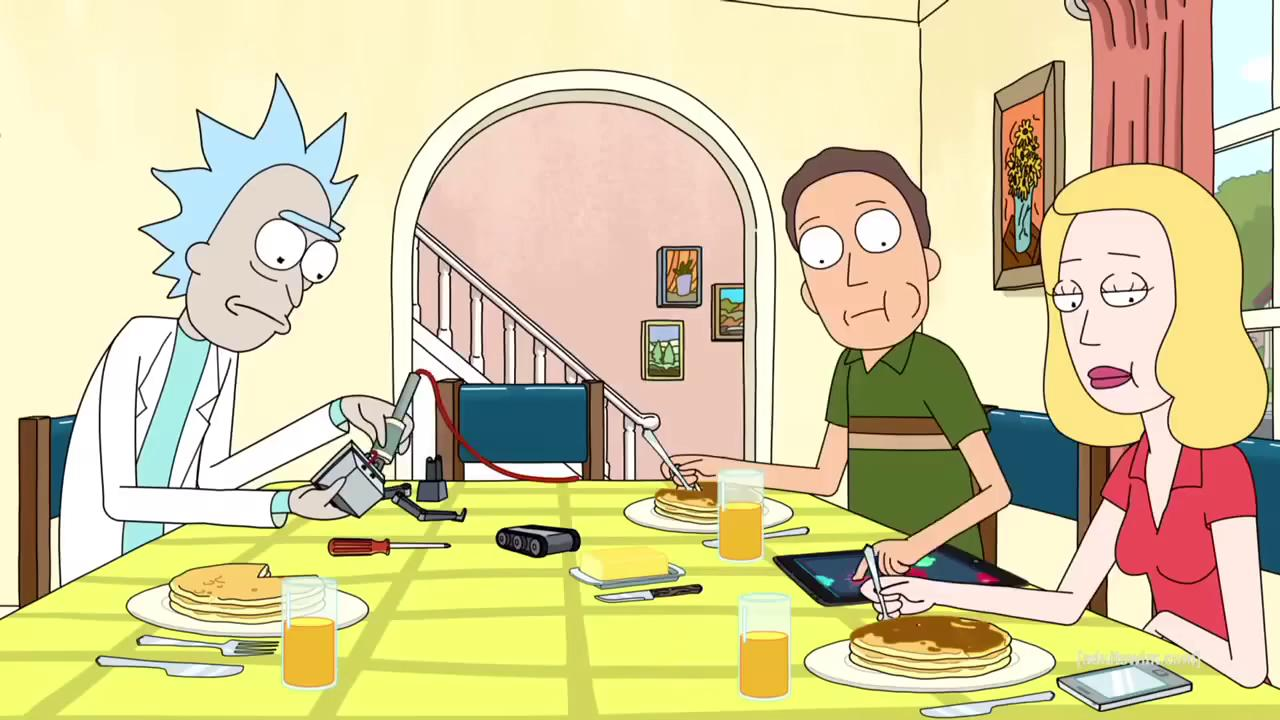
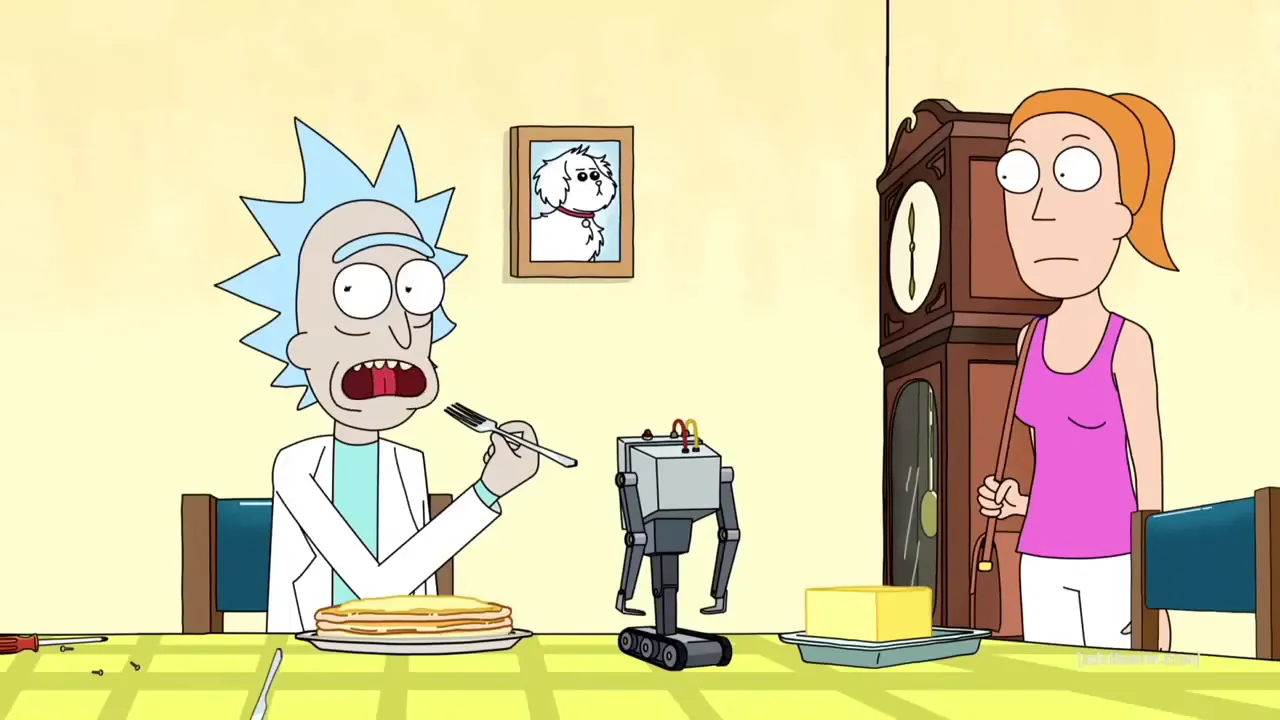
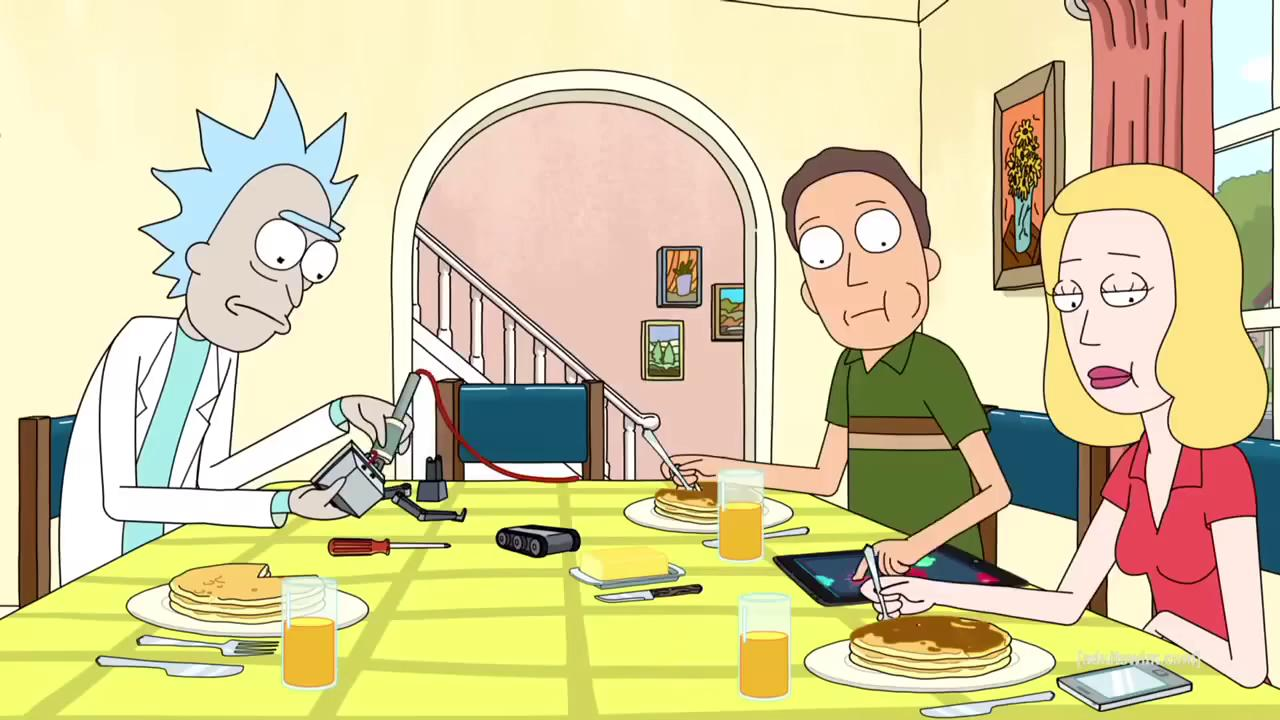
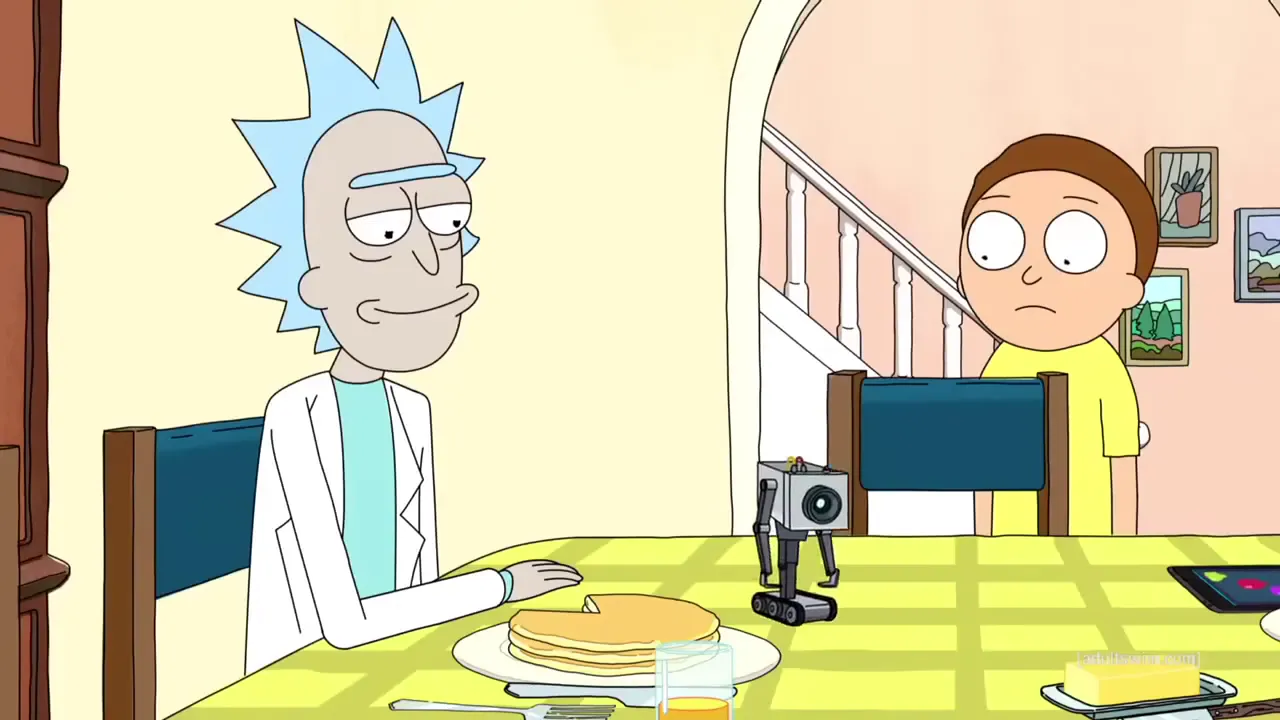
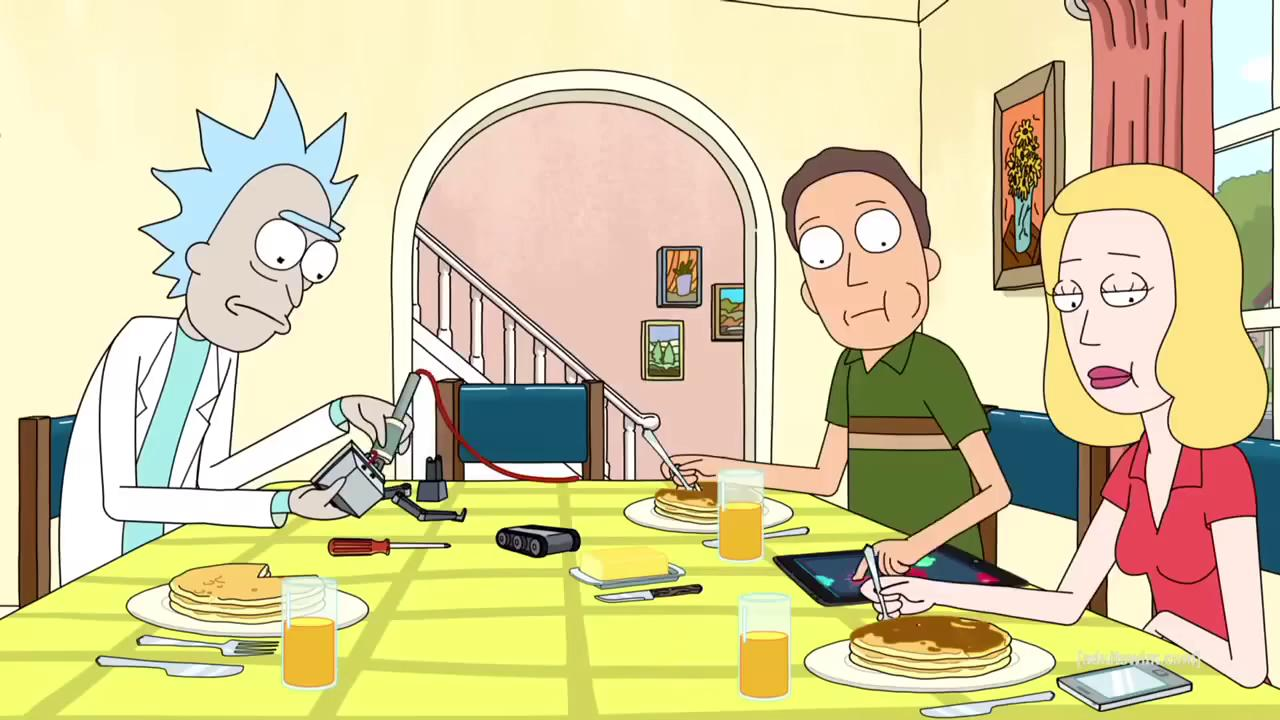
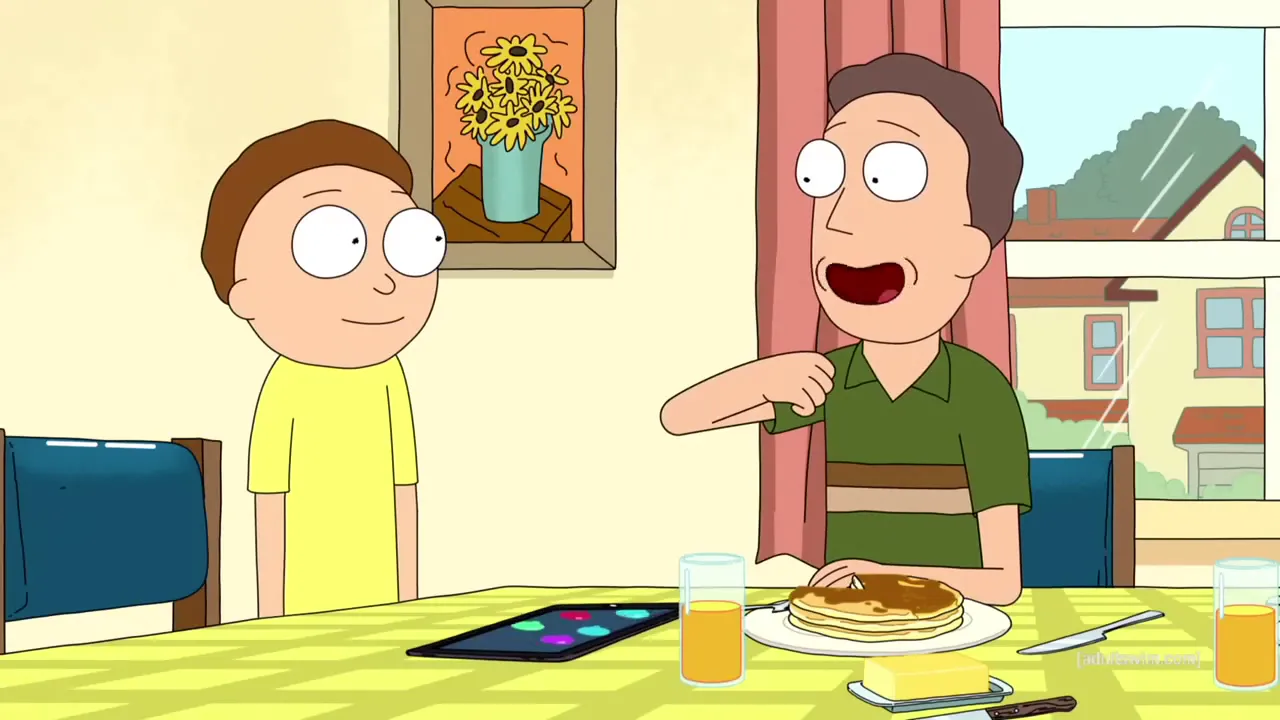
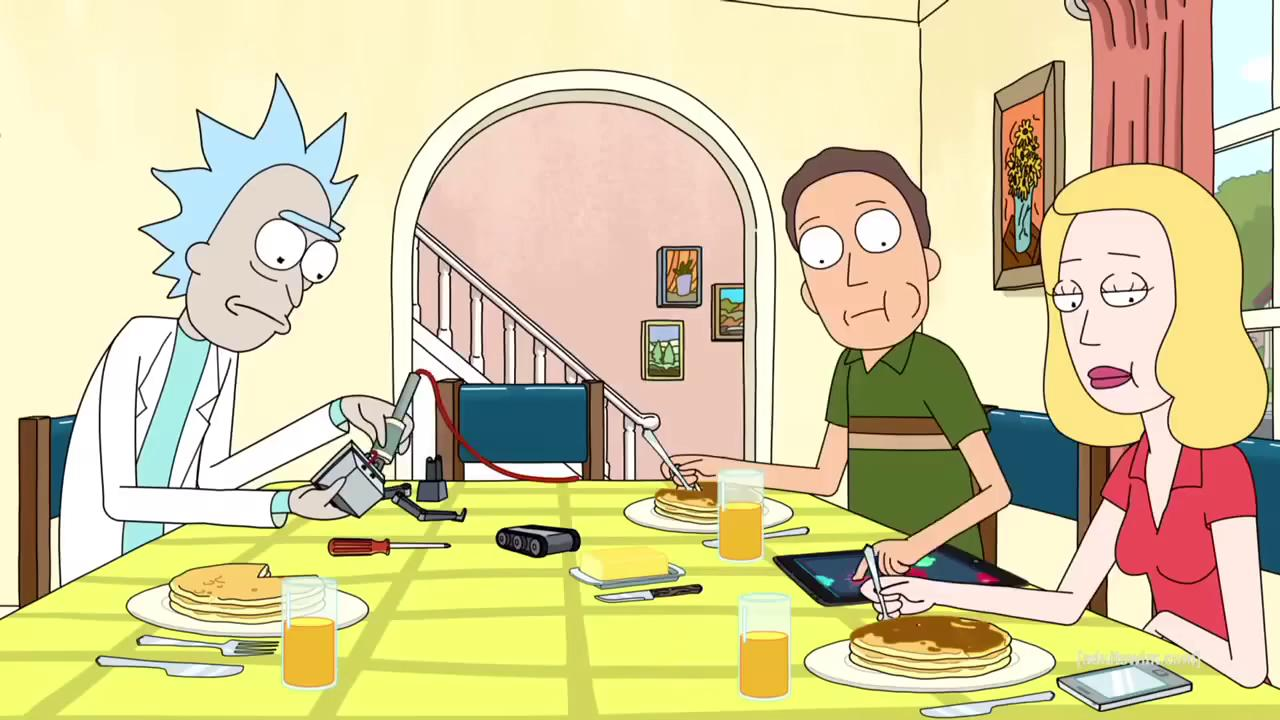
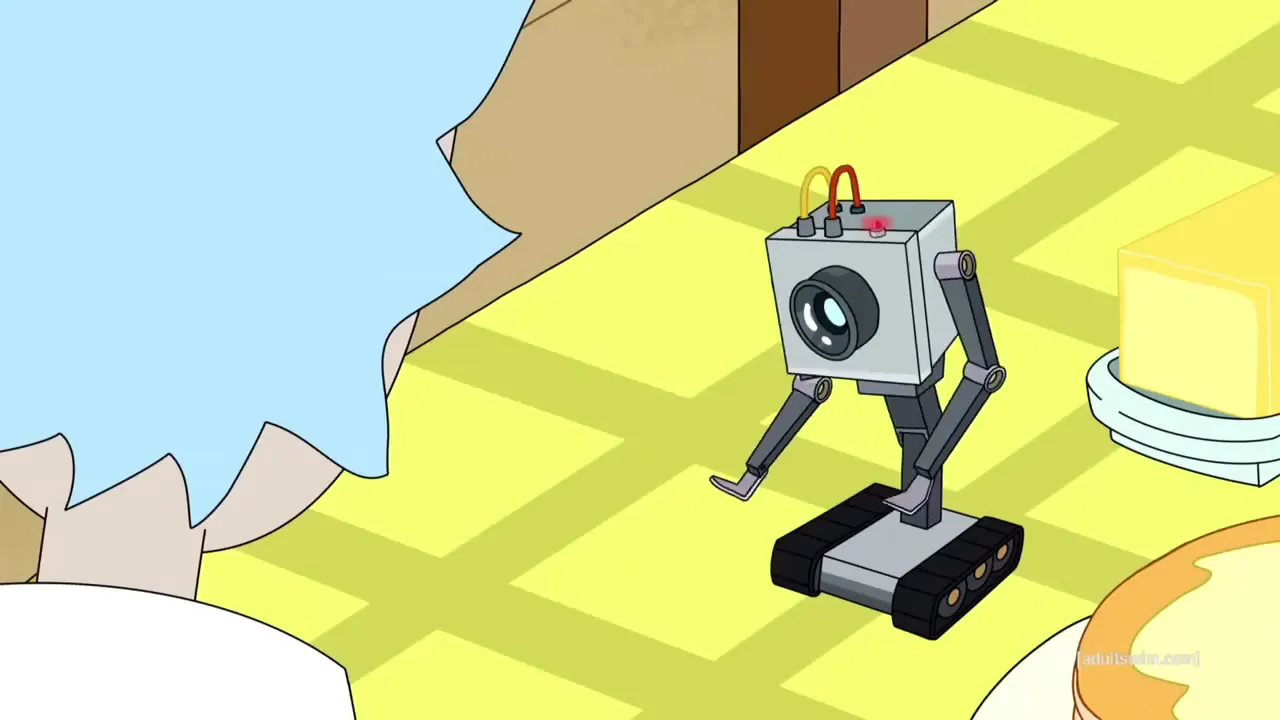
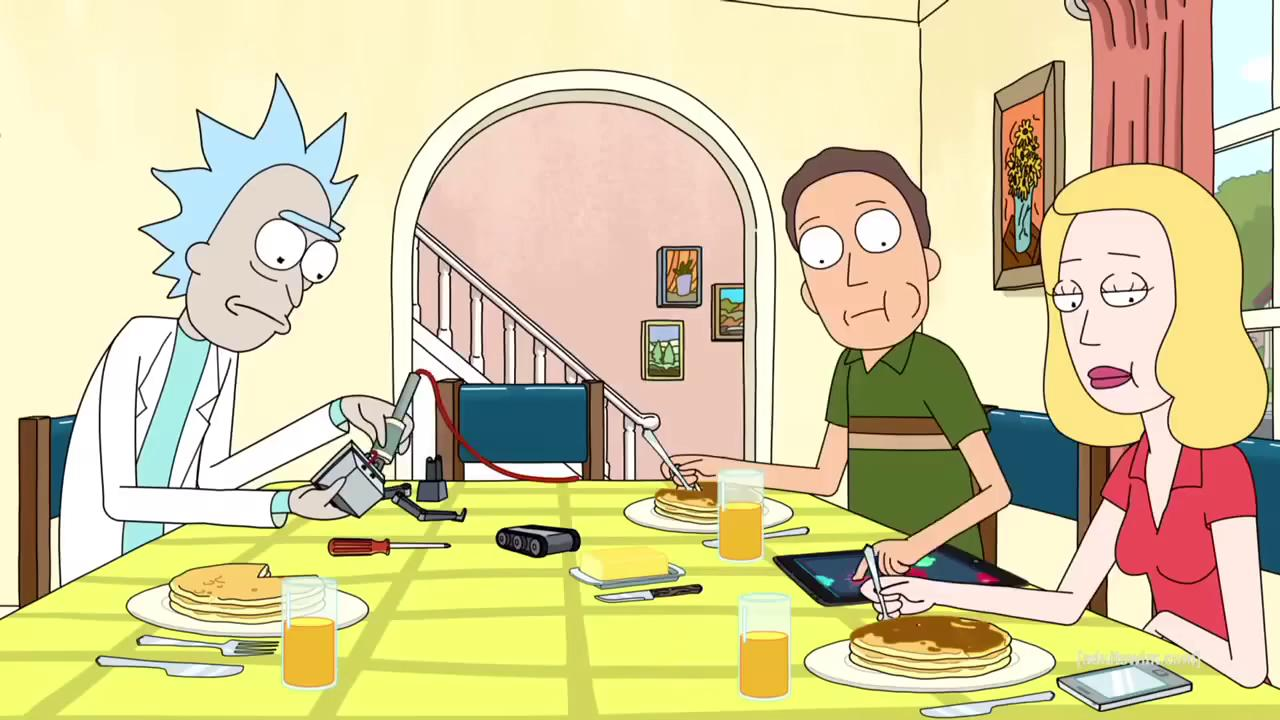
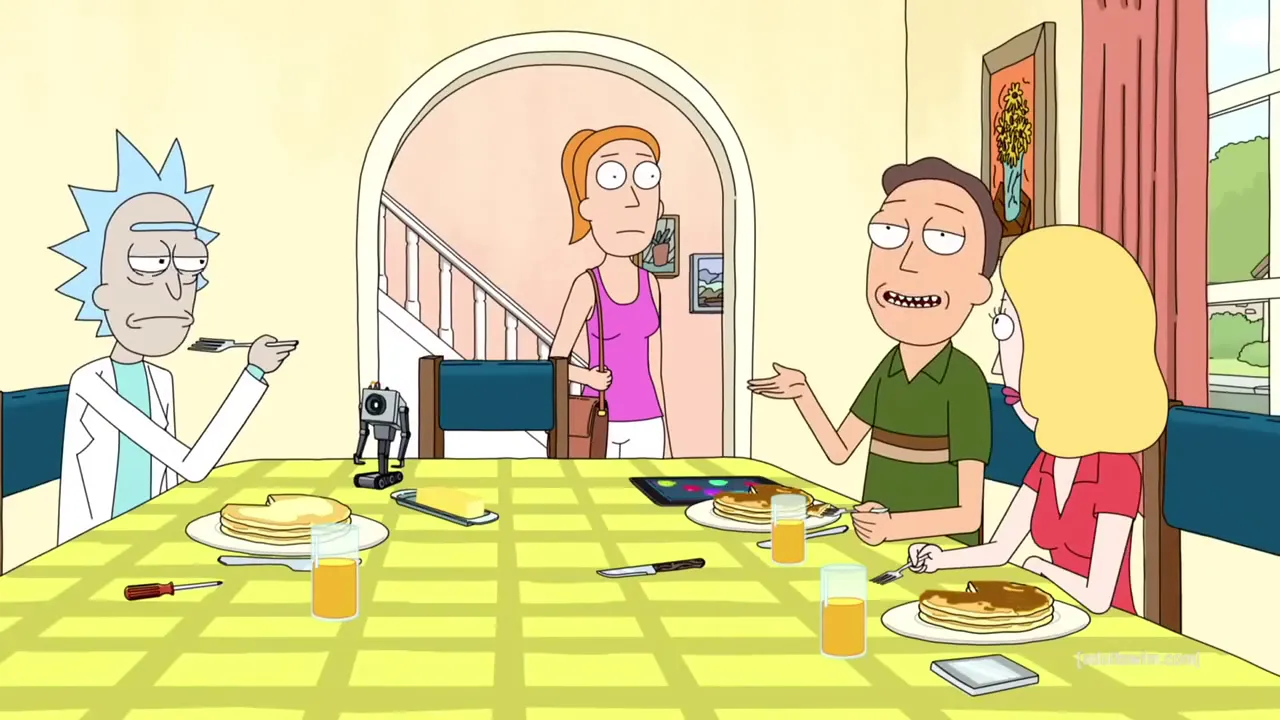
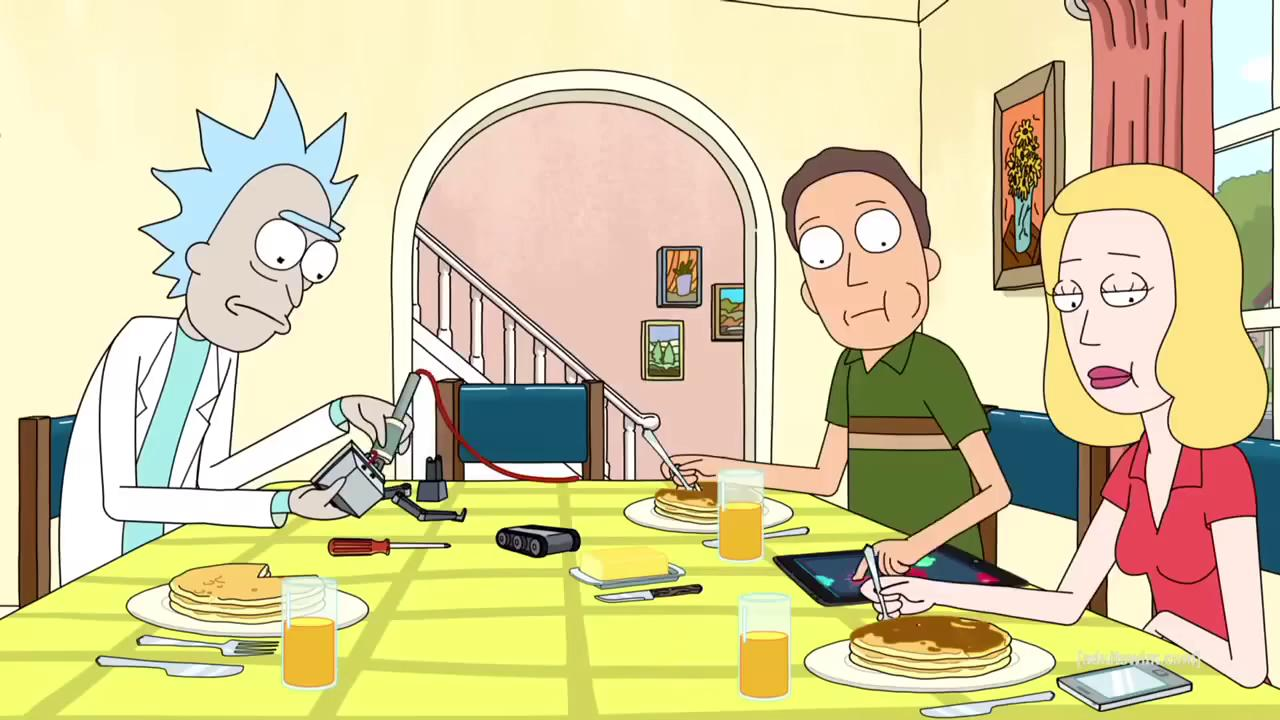
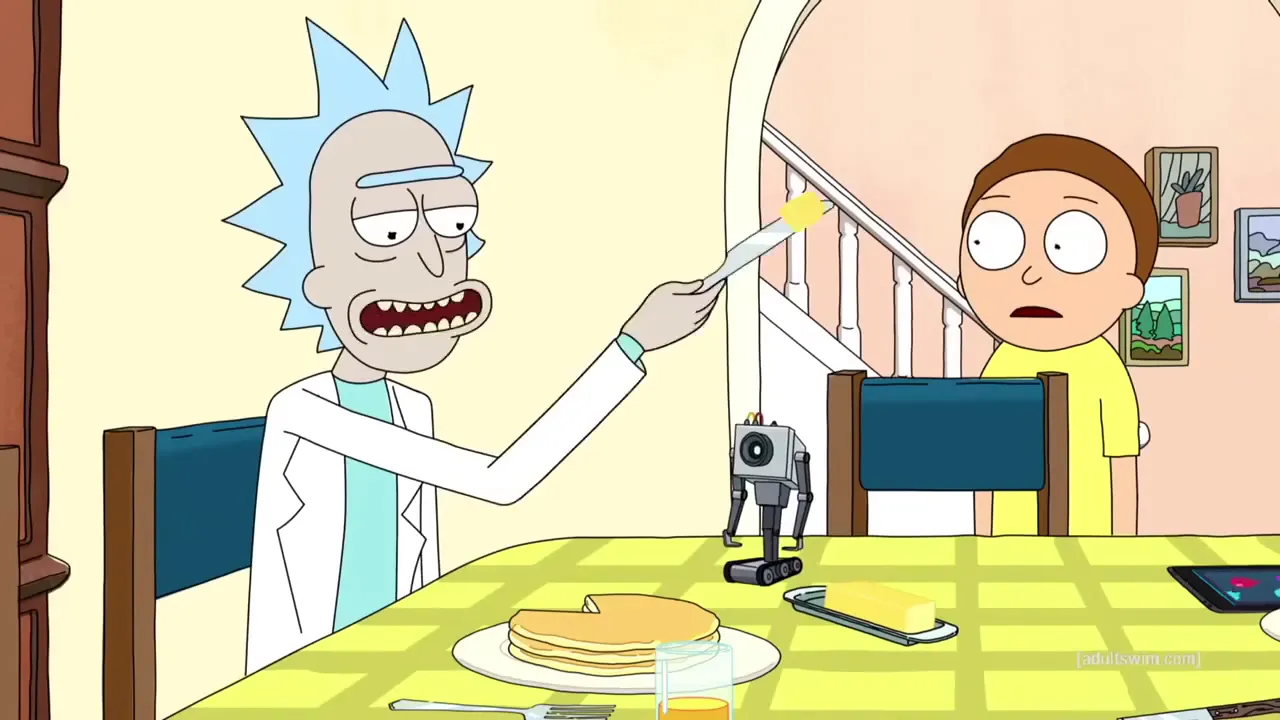
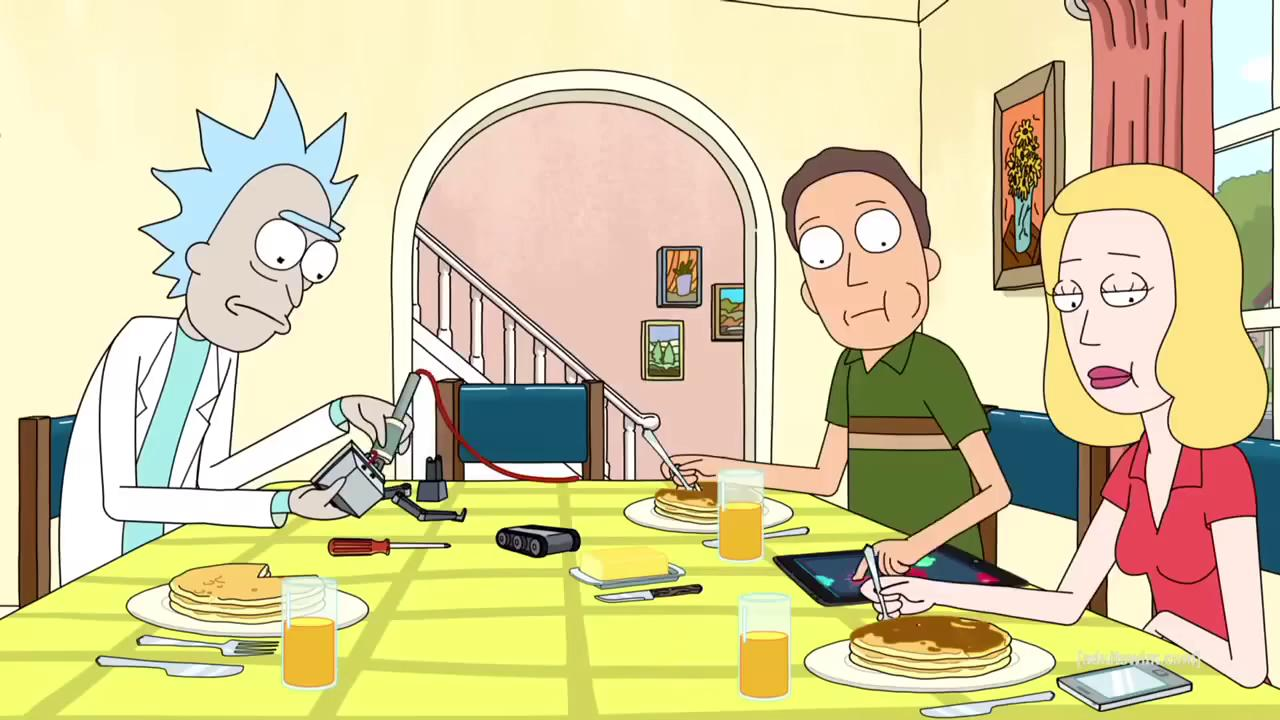
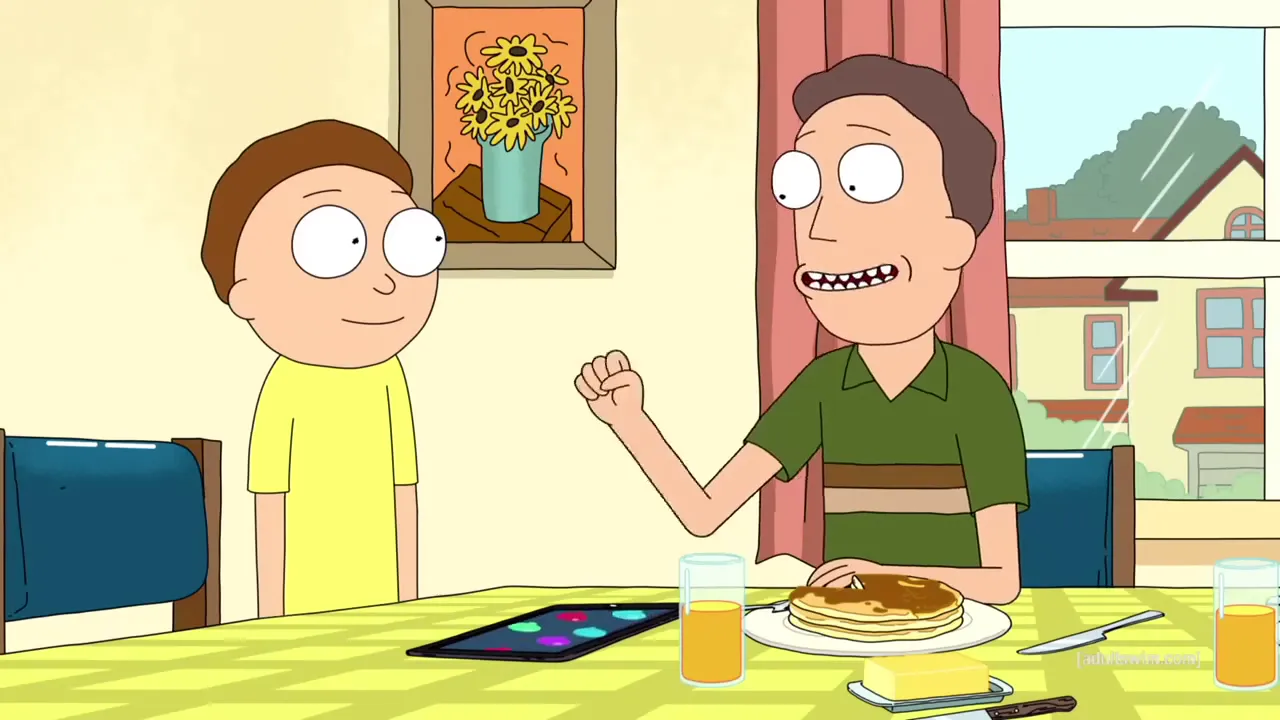
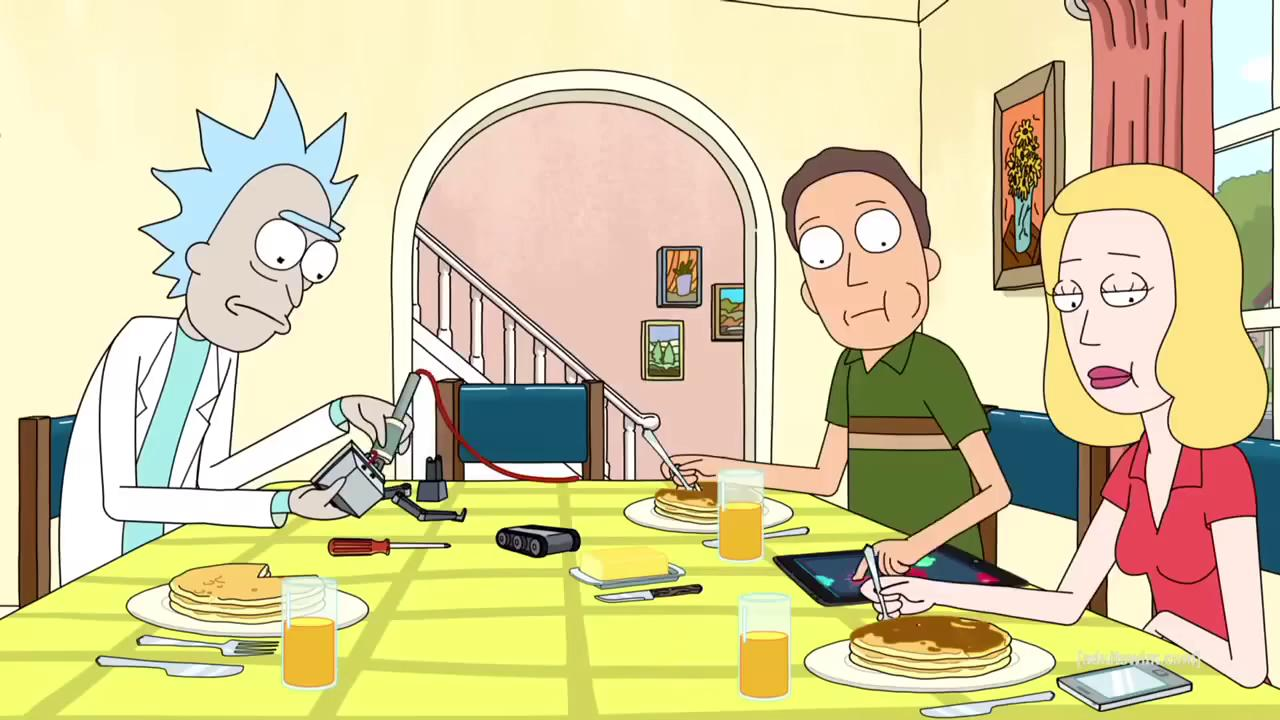
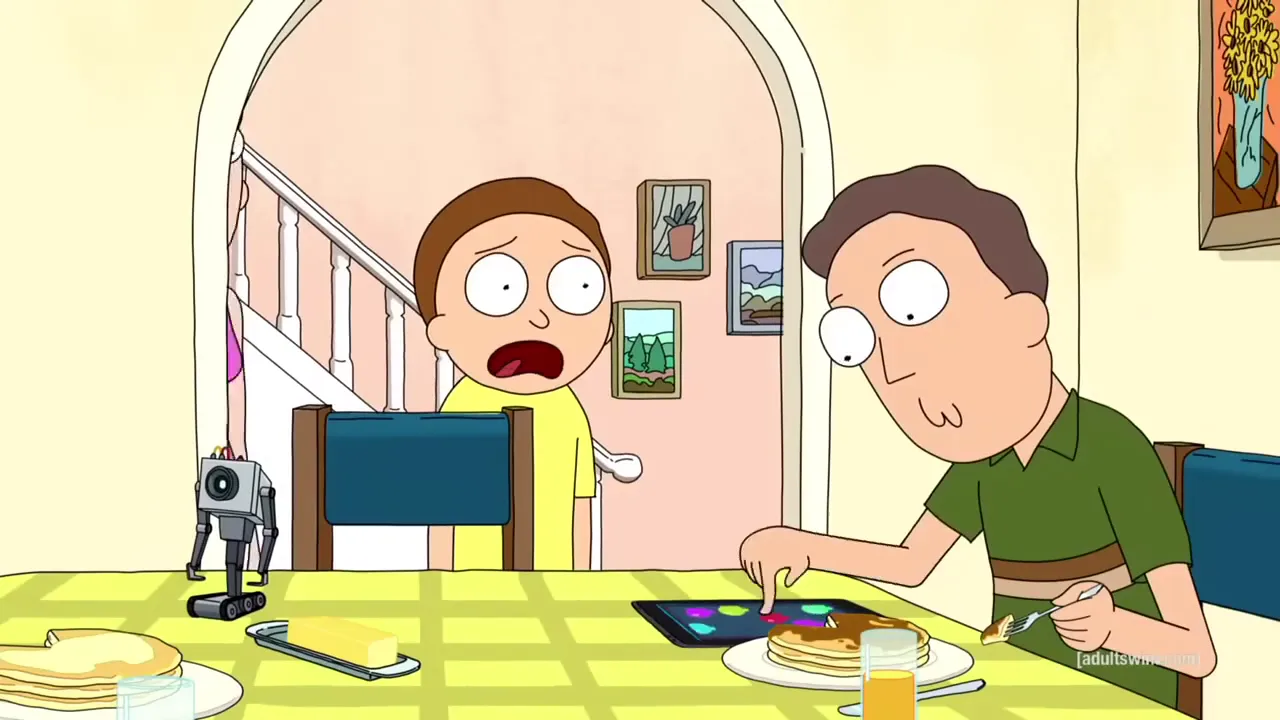
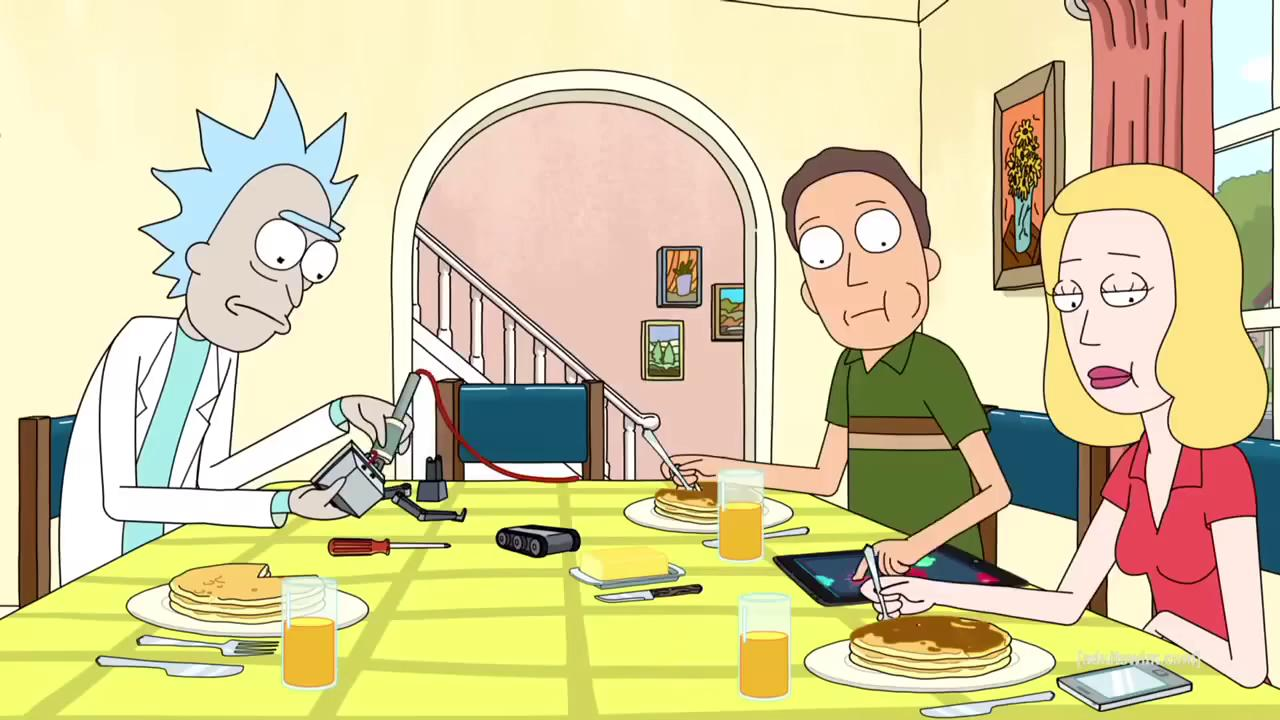
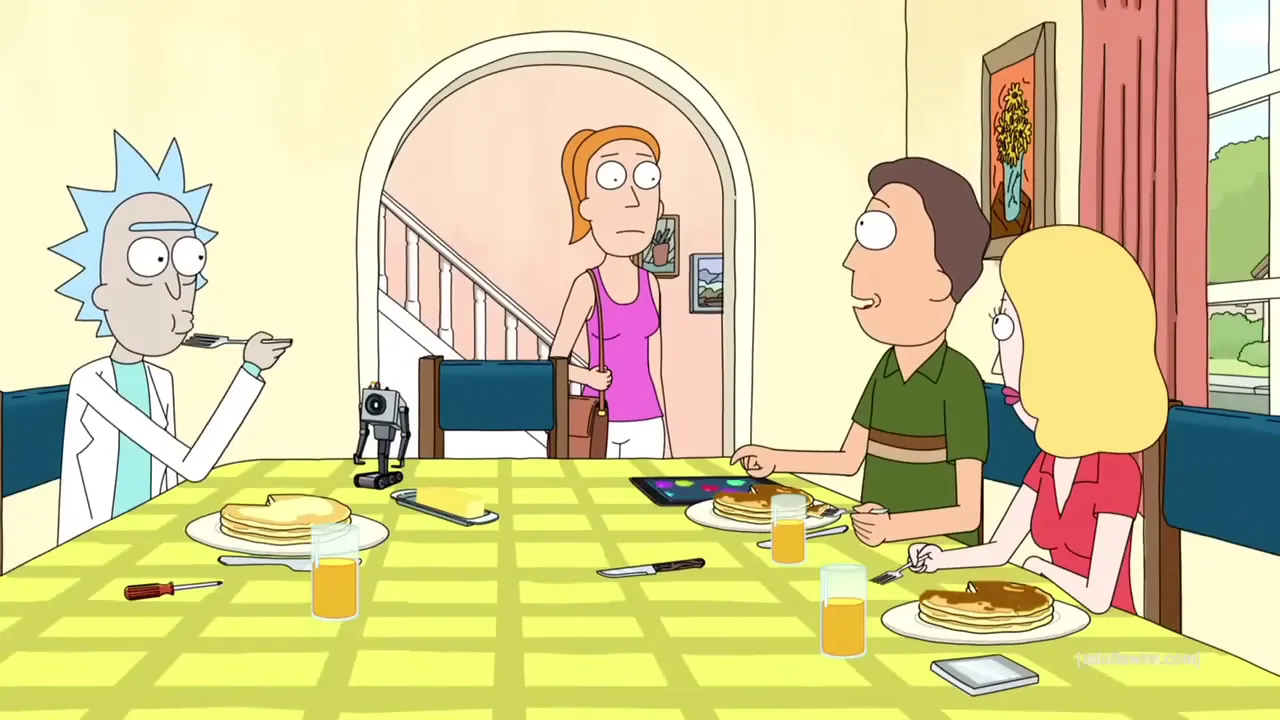
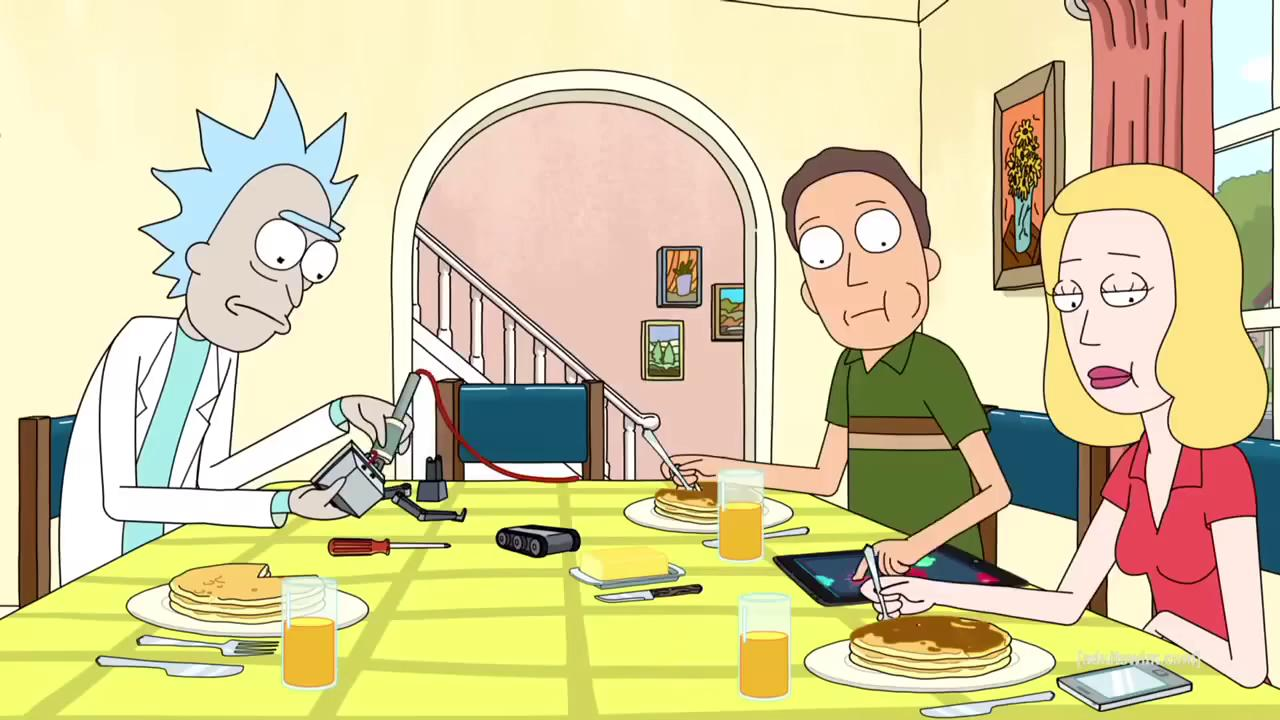
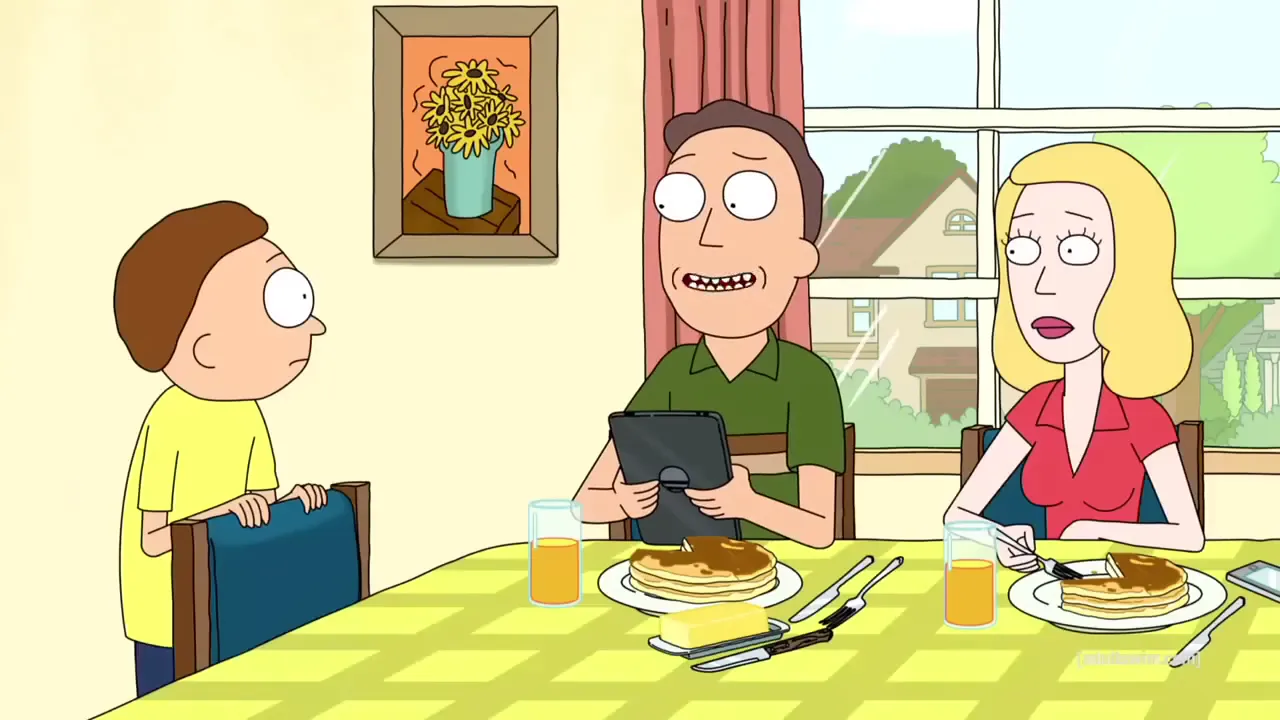
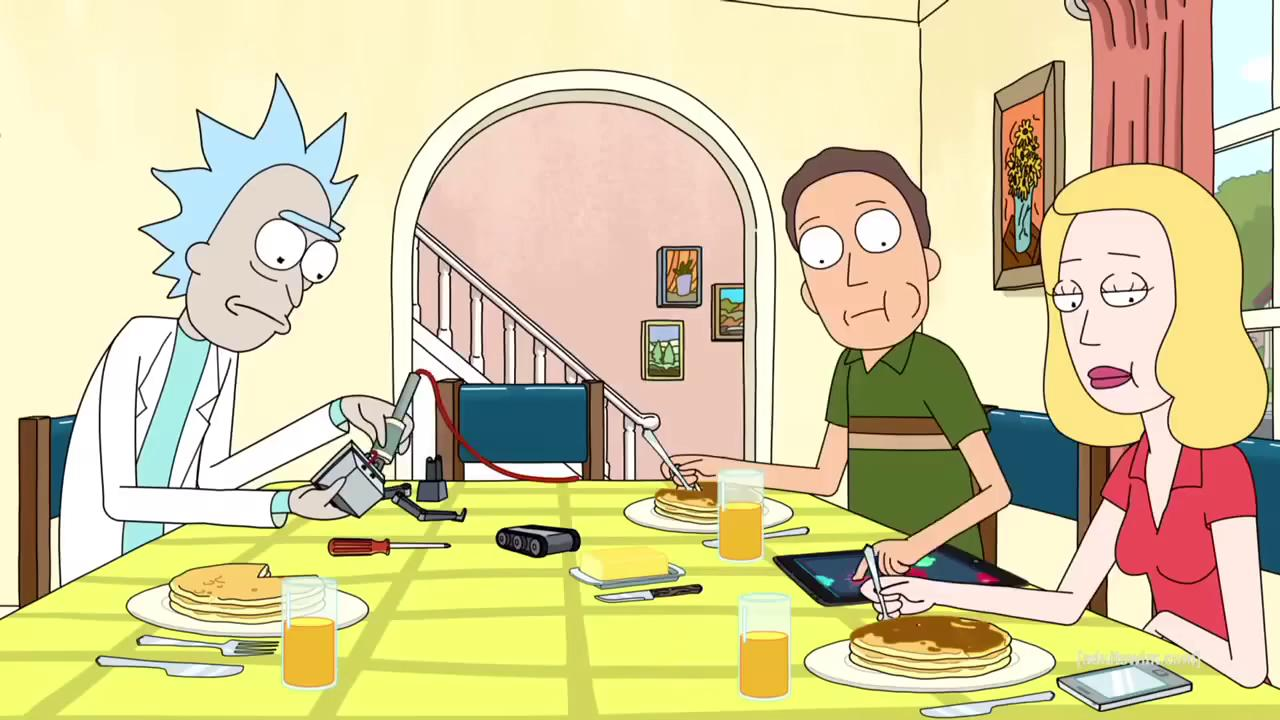
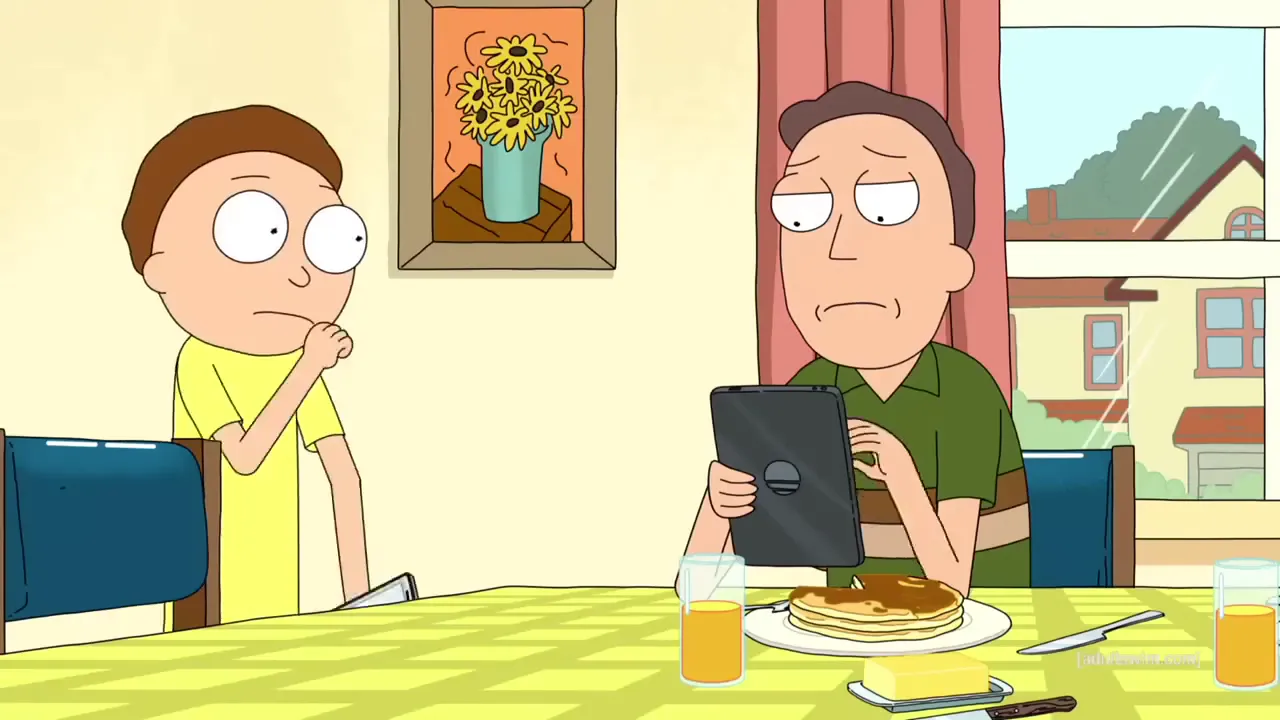
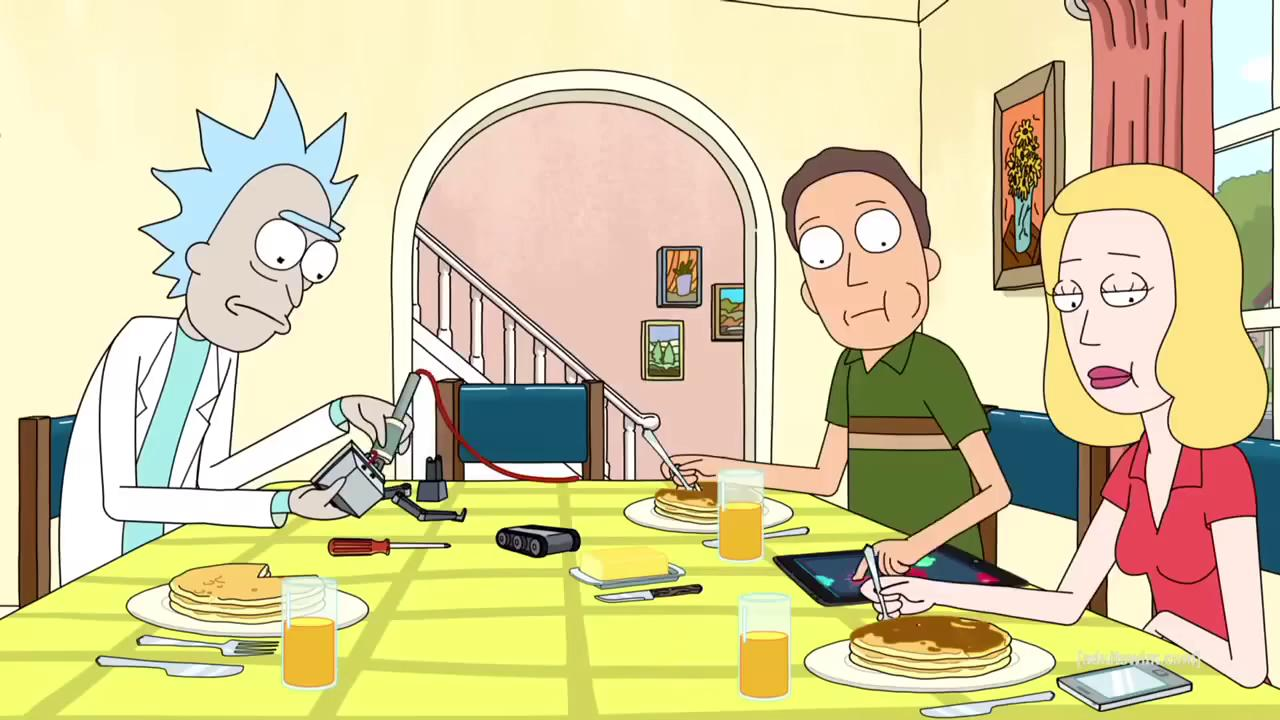
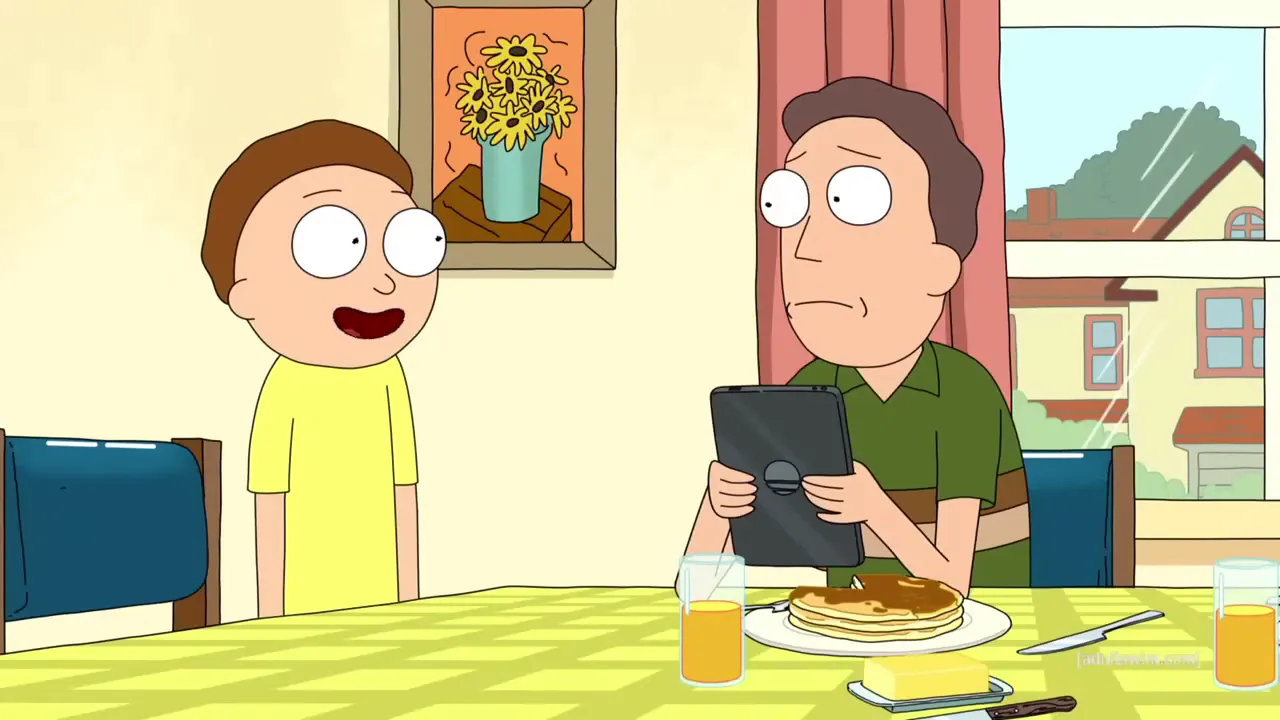
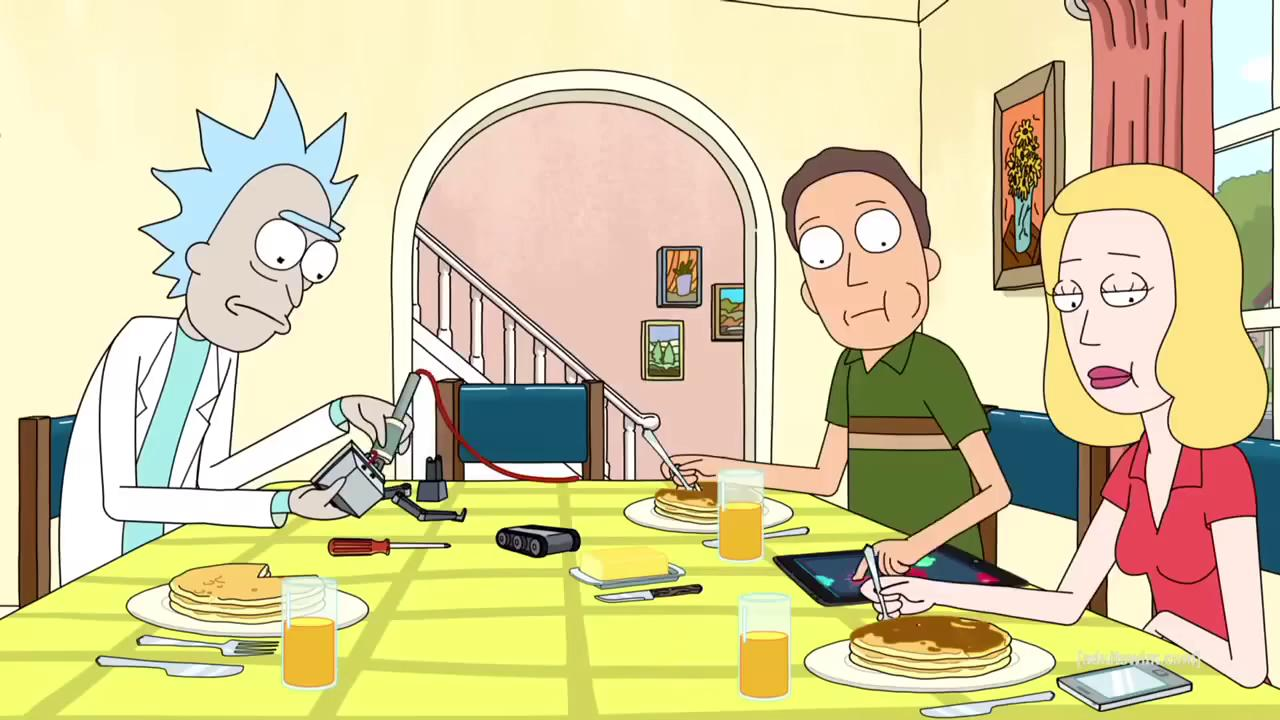
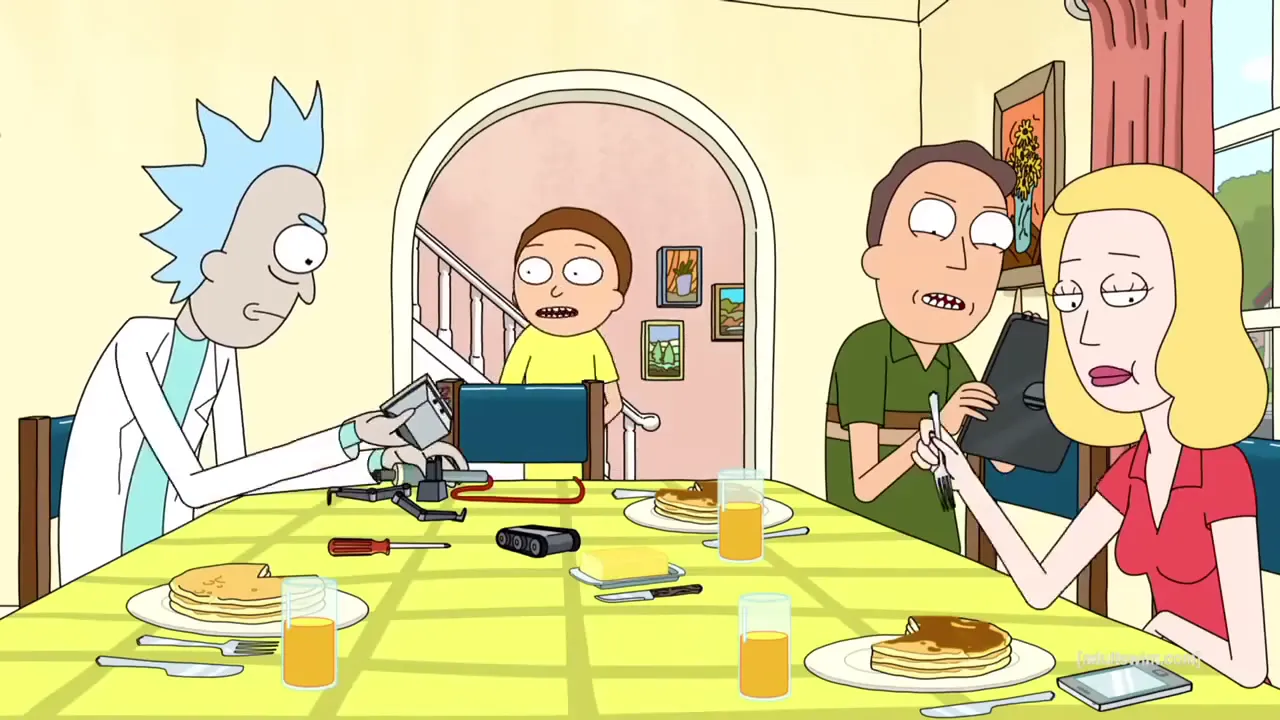
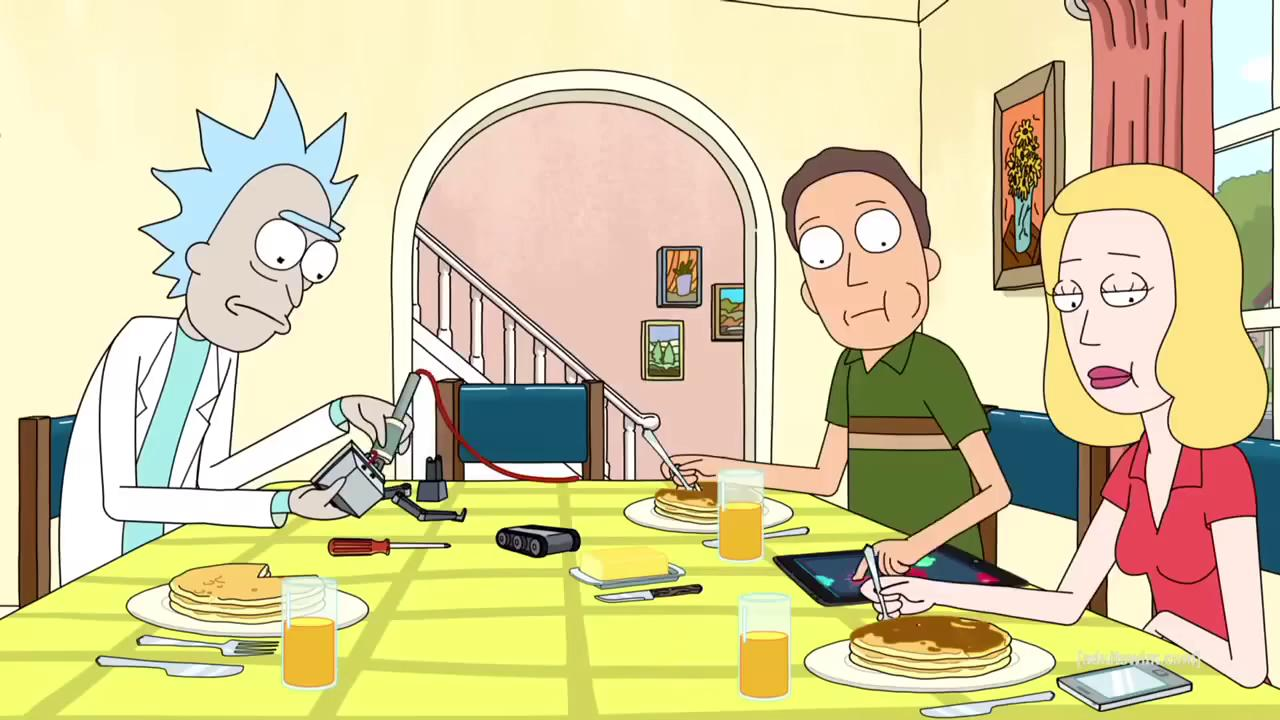
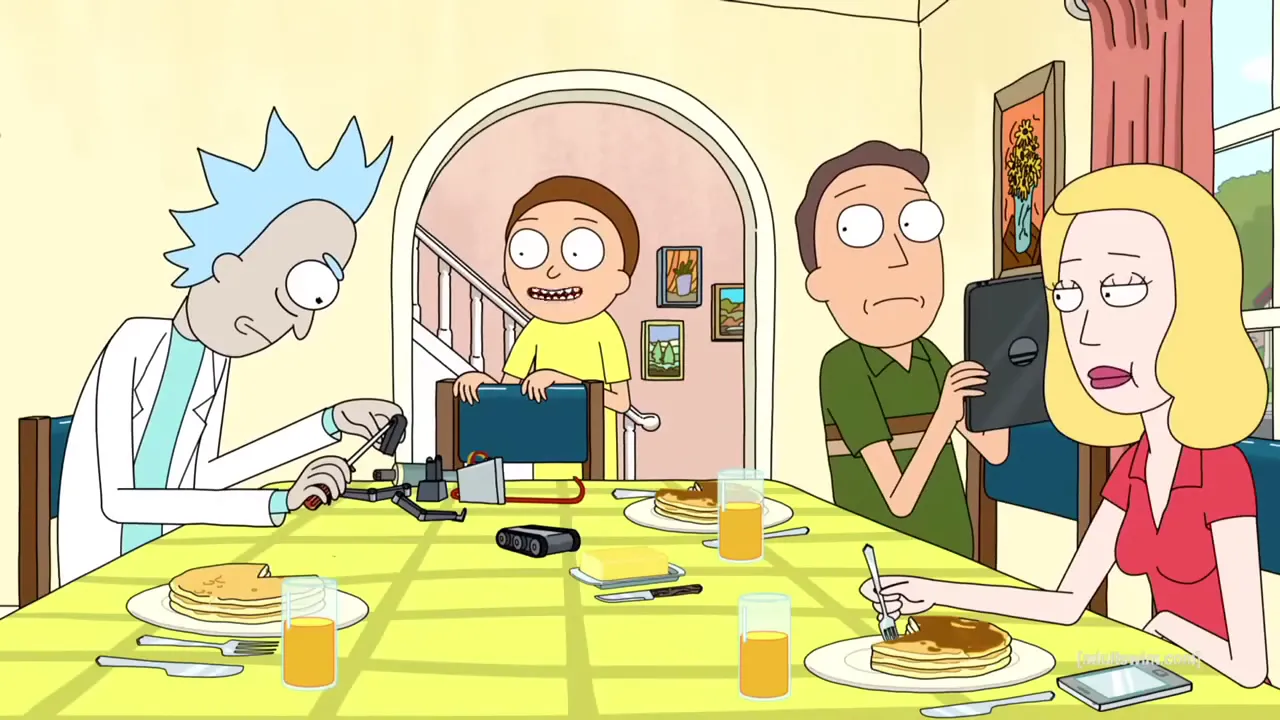
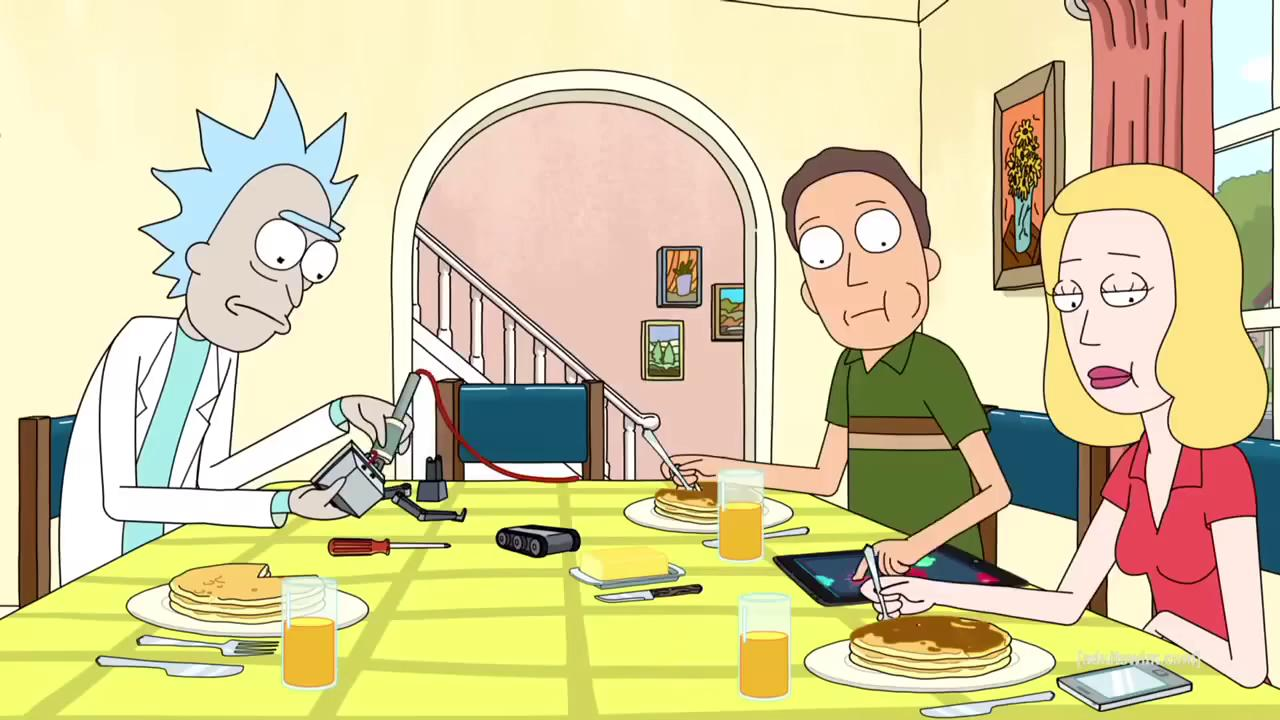
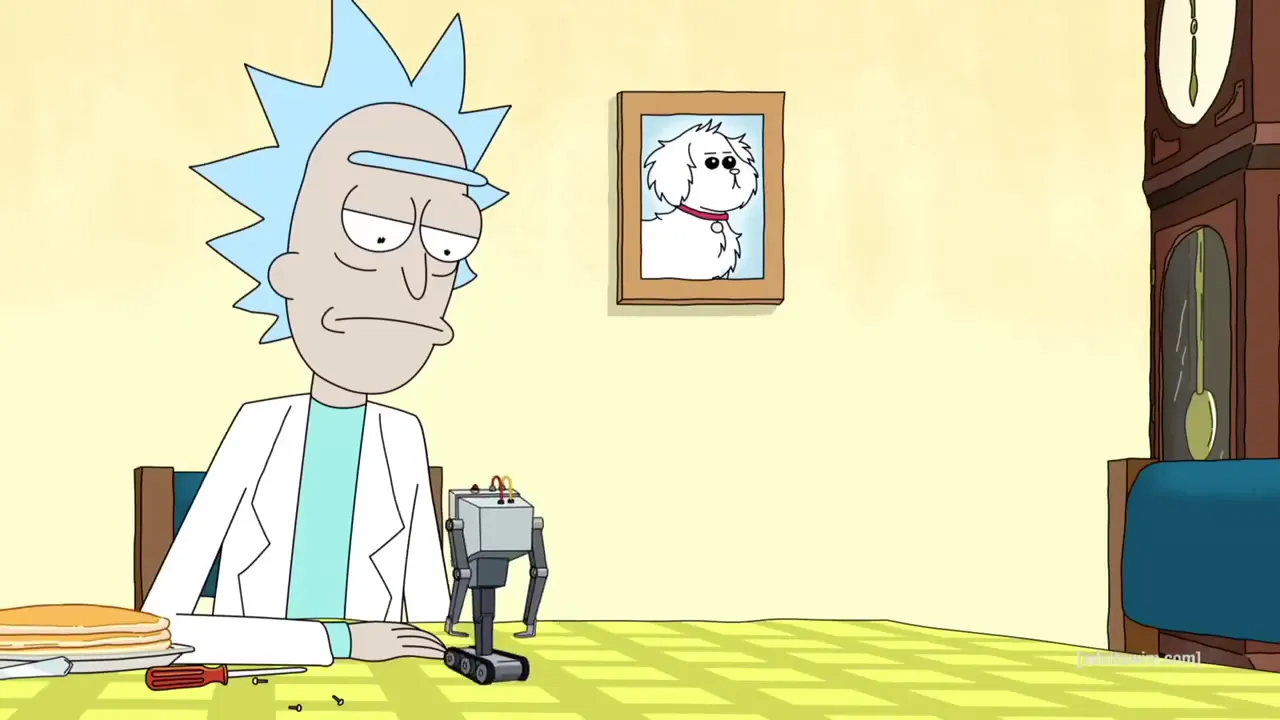
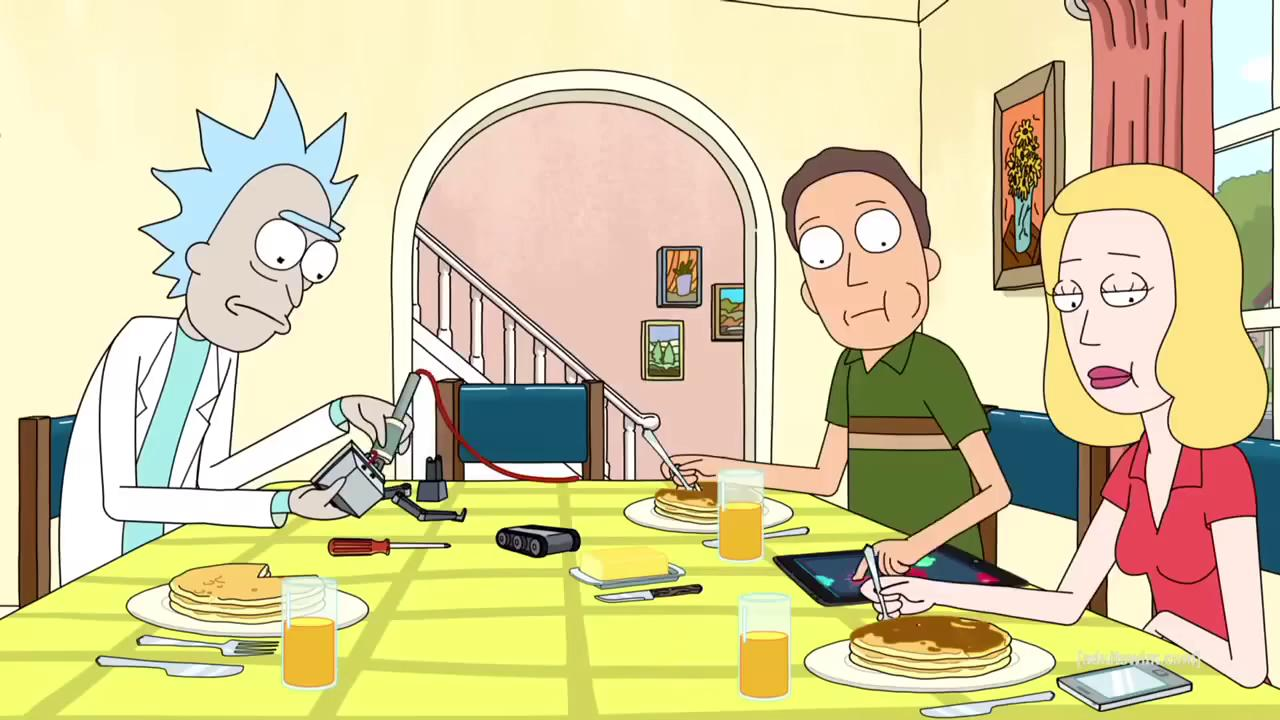
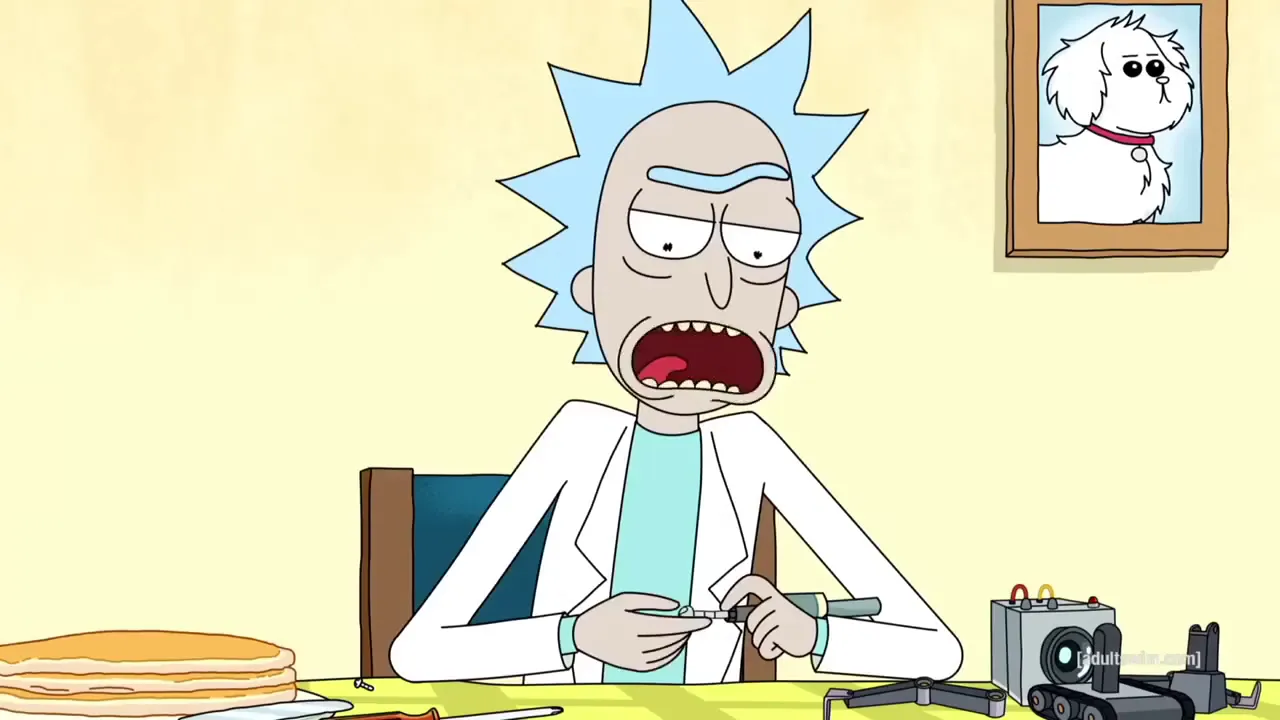
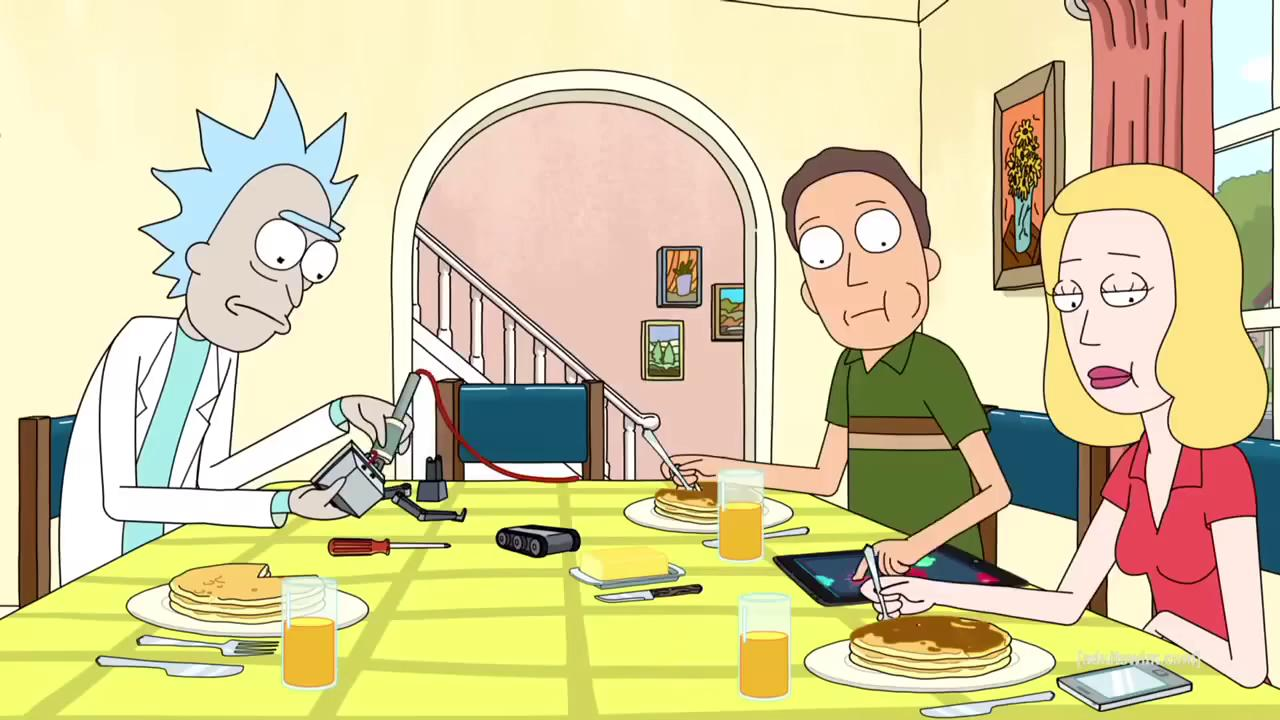
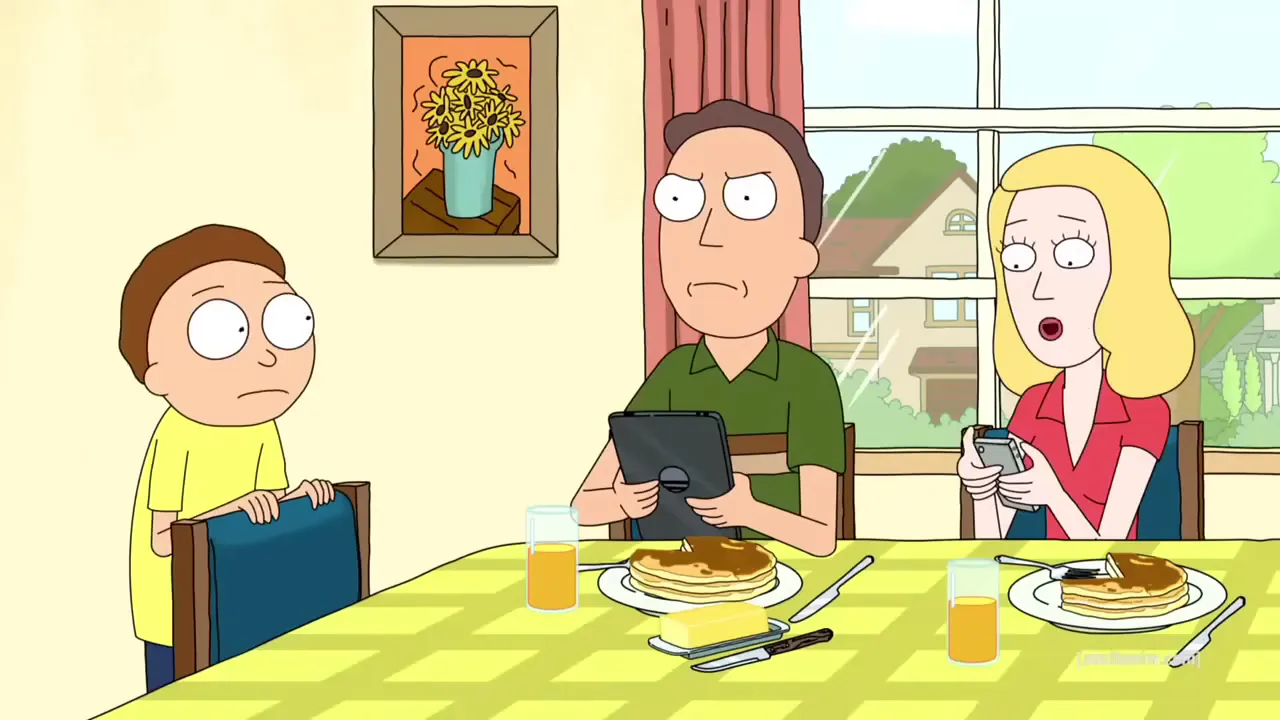
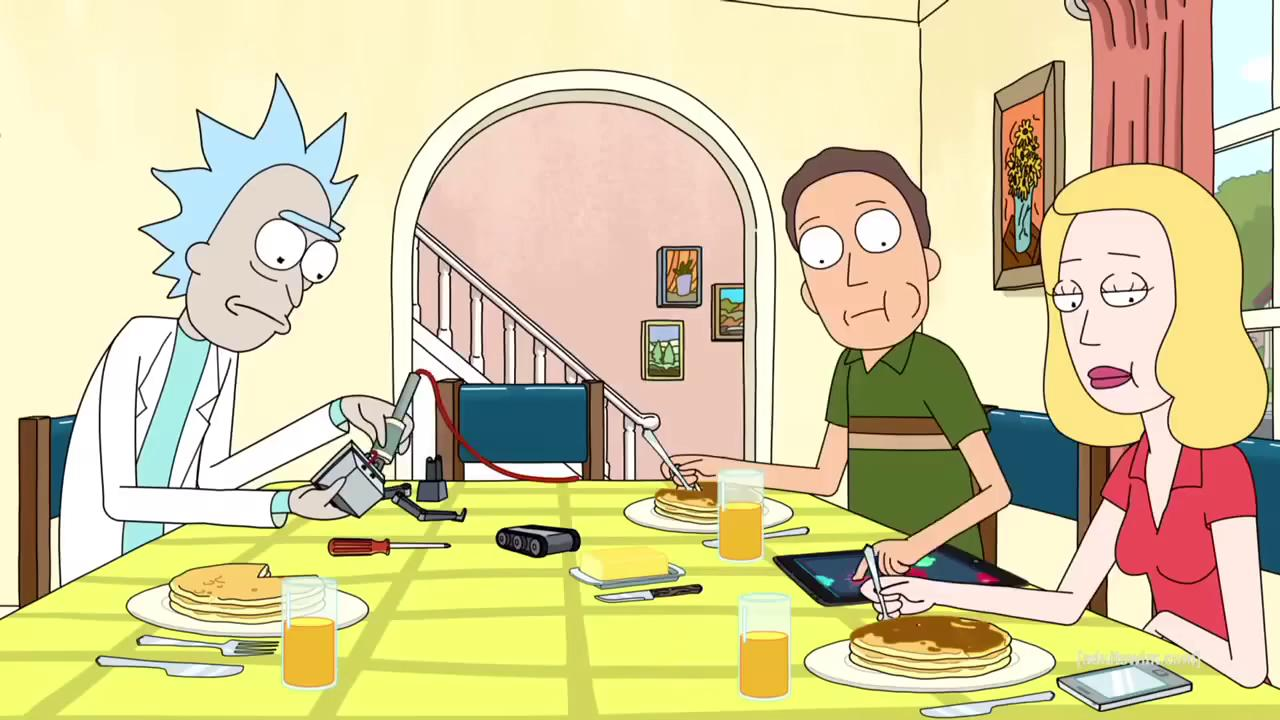
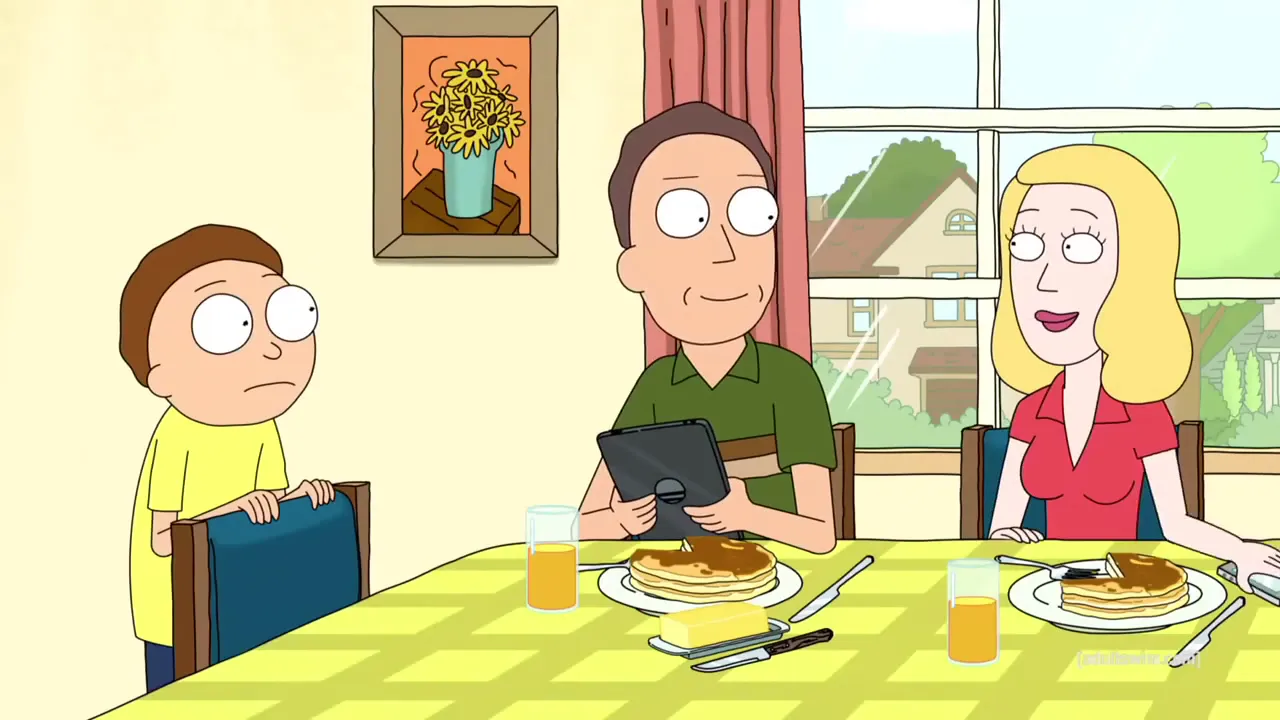
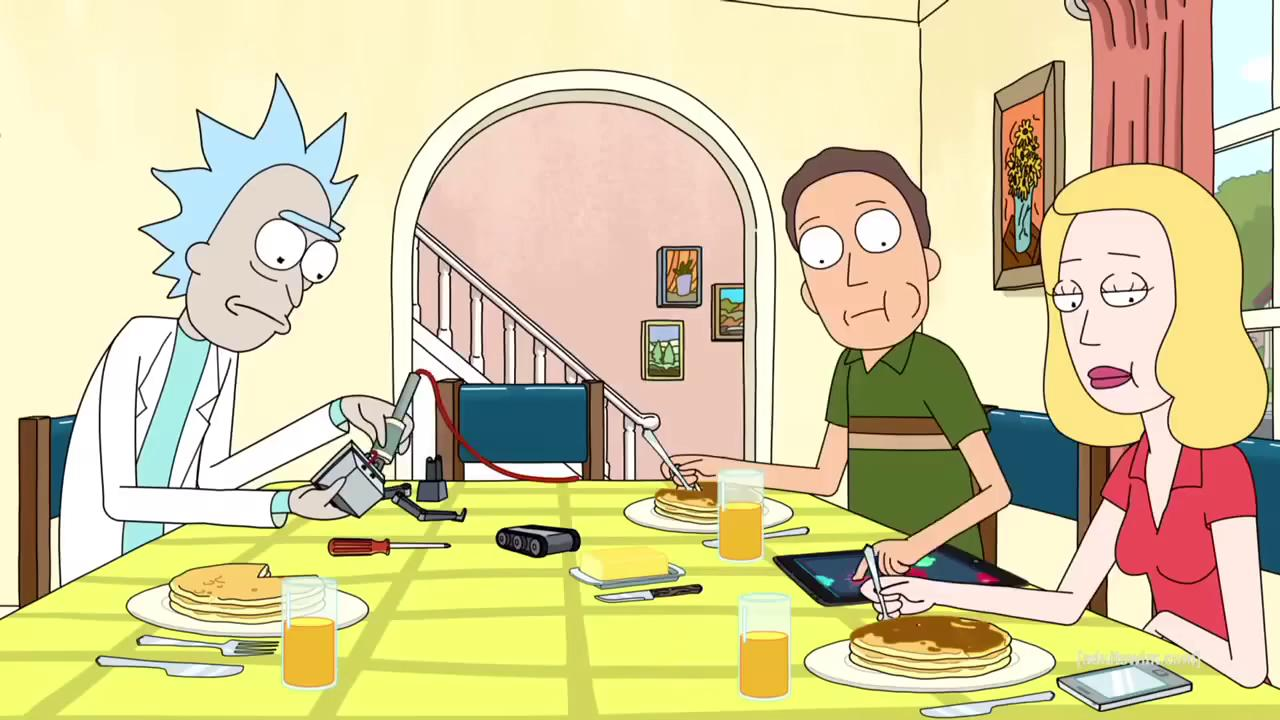
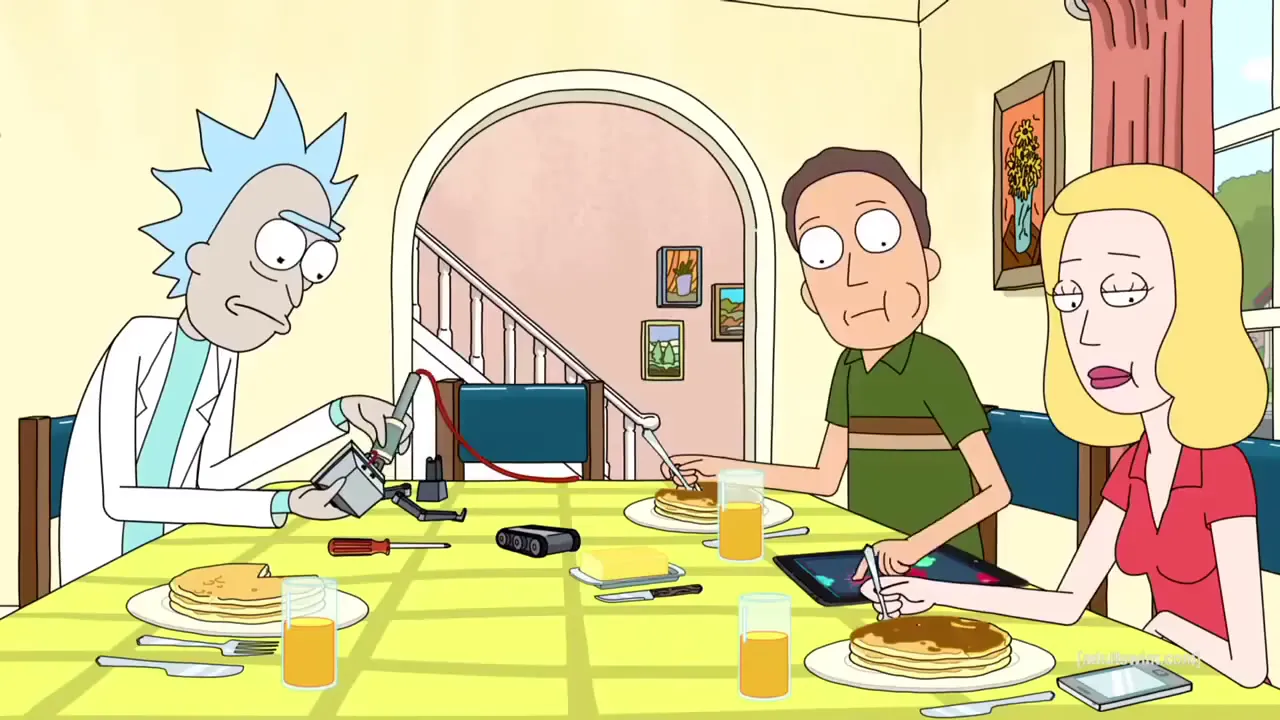
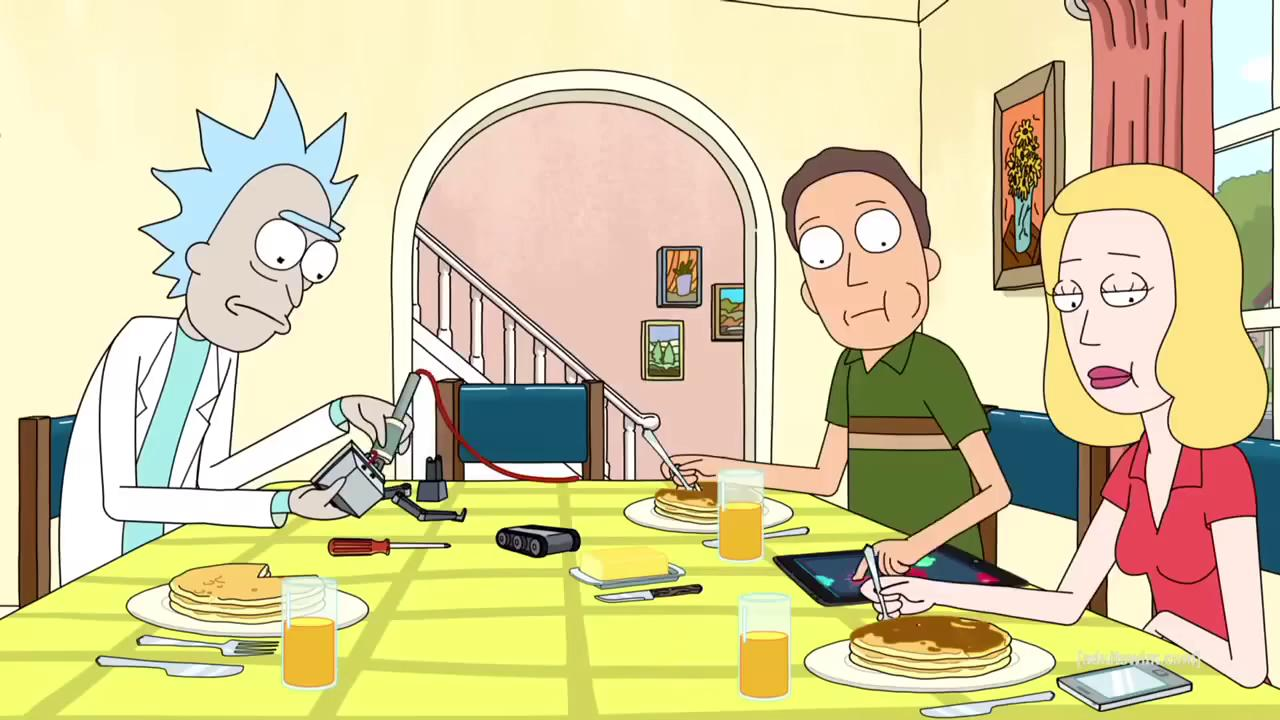

In [16]:
video_processor.frames_view.show()